In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, LSTM, Dropout


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [2]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [3]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


# Split data

## Data 1. fmap mean all experiments

In [6]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test =  df[(df['exp']==36) & (df['mini_exp']==6)]

In [8]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test.shape)

(2883584, 11)
(180224, 11)
(180224, 11)


In [9]:
X1_train = df1_train.iloc[:, 5:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 5:-1].values 
y1_test = df1_val['theory'].values

X1_pred = df1_test.iloc[:, 5:-1].values 
y1_pred = df1_val['theory'].values

In [11]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred.shape)
print(y1_pred.shape)

(2883584, 5)
(2883584,)
(180224, 5)
(180224,)
(180224, 5)
(180224,)


## Data2: One experiment

In [55]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

In [29]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
901115,0.0,0.0,0.0,0.0,0.0
901116,0.0,0.0,0.0,0.0,0.0
901117,0.0,0.0,0.0,0.0,0.0
901118,0.0,0.0,0.0,0.0,0.0


In [30]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [31]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Data4: None zero

In [71]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [72]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
30760,36,1,7,32,40,118.874306,102.631088,73.720810,46.604973,35.842915,4.988159
30761,36,1,7,32,41,-69.809402,-88.836975,-115.809509,-147.981812,-157.407669,4.591202
30762,36,1,7,32,42,-501.965088,-518.938477,-546.379456,-559.395264,-578.390381,4.237324
30763,36,1,7,32,43,-729.152405,-748.379883,-771.094543,-794.678772,-810.996643,3.918999
30799,36,1,7,33,15,-1217.971191,-1236.205566,-1261.405762,-1284.039307,-1296.501587,3.371496
...,...,...,...,...,...,...,...,...,...,...,...
3213651,38,6,36,37,19,-75.107628,-68.905487,-75.427681,-82.513771,-79.595093,4.270157
3213652,38,6,36,37,20,76.162445,81.230690,75.100578,66.783051,69.944969,4.636876
3213653,38,6,36,37,21,196.146164,202.442993,194.505157,186.740524,189.227448,5.051056
3213660,38,6,36,37,28,749.112549,763.357300,750.066223,730.827637,739.551208,13.024664


In [73]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6)]

In [74]:
X4_train = df4_train.iloc[:, 5:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 5:-1].values
y4_test = df4_test['theory'].values

X4_pred = df4_pred.iloc[:, 5:-1].values
y4_pred = df4_pred['theory'].values

In [25]:
# X = df_nonzero.iloc[:, 5:-1].values
# y = df_nonzero['theory'].values

# X4_train, X4_test, y4_train, y4_test = train_test_split(
#     X, y, test_size=0.3, random_state=0)

In [76]:
# print(X.shape)
# print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred.shape)
print(y4_pred.shape)

(554737, 5)
(554737,)
(34011, 5)
(34011,)
(34012, 5)
(34012,)


## Data5: Normalize one experiment

In [117]:
scaler = MinMaxScaler()
# transform data
X5_train = scaler.fit_transform(X2_train)
X5_test = scaler.fit_transform(X2_test)

## Data6: Scale one experiment

In [118]:
scaler = StandardScaler()
# transform data
X6_train = scaler.fit_transform(X2_train)
X6_test = scaler.fit_transform(X2_test)

# Neural Network

## Find out best layer and units

In [21]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2883584, 5)
(2883584,)
(180224, 5)
(180224,)


In [10]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [11]:
def create_nn(layer_size, unit_size):
    model = keras.Sequential()
    for i in range(1, layer_size):
        if i == 1:
            model.add(Dense(unit_size, activation='relu', input_shape=(len(X_train[0]),)))
        else:
            model.add(Dense(unit_size, activation='relu'))
    
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)
    
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

In [12]:
max_range_layer = 11
max_range_unit = 11
acc_arr = []
loss_arr = []
coef_arr = []
err_arr = []
for i in range(1, max_range_layer):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    for j in range(1, max_range_unit):
        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        acc, loss, coef, err = create_nn(i, j)
        acc_unit.append(acc)
        loss_unit.append(loss)
        coef_unit.append(coef)
        err_unit.append(err)
    
    acc_arr.append(acc_unit)
    loss_arr.append(loss_unit)
    coef_arr.append(coef_unit)
    err_arr.append(err_unit)

##### Layer:1 Unit:1 #####


2022-11-03 22:36:01.296672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
70964/70964 [==============================] - 83s 1ms/step - loss: 986.9774 - accuracy: 0.0322 - val_loss: 75.2828 - val_accuracy: 1.7057e-04
Epoch 2/100
70964/70964 [==============================] - 82s 1ms/step - loss: 71.7571 - accuracy: 1.6294e-04 - val_loss: 76.4331 - val_accuracy: 1.9523e-05
Epoch 3/100
70964/70964 [==============================] - 81s 1ms/step - loss: 71.7107 - accuracy: 1.6382e-04 - val_loss: 75.7950 - val_accuracy: 2.0037e-04
Epoch 4/100
70964/70964 [==============================] - 79s 1ms/step - loss: 71.6657 - accuracy: 1.5281e-04 - val_loss: 83.5393 - val_accuracy: 2.0345e-04
Epoch 5/100
70964/70964 [==============================] - 77s 1ms/step - loss: 71.7106 - accuracy: 1.5633e-04 - val_loss: 74.6508 - val_accuracy: 2.0140e-04
Epoch 6/100
70964/70964 [==============================] - 77s 1ms/step - loss: 71.6303 - accuracy: 1.6646e-04 - val_loss: 74.6920 - val_accuracy: 2.0140e-04
Epoch 7/100
70964/70964 [==============================

Epoch 17/100
70964/70964 [==============================] - 75s 1ms/step - loss: 71.5452 - accuracy: 1.6382e-04 - val_loss: 75.3828 - val_accuracy: 1.7571e-04
Epoch 18/100
70964/70964 [==============================] - 75s 1ms/step - loss: 71.5813 - accuracy: 1.6558e-04 - val_loss: 86.9922 - val_accuracy: 1.1303e-05
Epoch 19/100
70964/70964 [==============================] - 74s 1ms/step - loss: 71.4878 - accuracy: 1.6514e-04 - val_loss: 103.9614 - val_accuracy: 2.0345e-04
Epoch 20/100
70964/70964 [==============================] - 75s 1ms/step - loss: 72.0237 - accuracy: 1.6073e-04 - val_loss: 75.0152 - val_accuracy: 1.7571e-04
Epoch 21/100
30413/30413 [==============================] - 23s 766us/step - loss: 79.9004 - accuracy: 1.0275e-05
##### Layer:1 Unit:8 #####
Epoch 1/100
70964/70964 [==============================] - 76s 1ms/step - loss: 1080.9044 - accuracy: 0.0196 - val_loss: 76.4431 - val_accuracy: 1.5413e-05
Epoch 2/100
70964/70964 [==============================] - 76s 1ms

70964/70964 [==============================] - 77s 1ms/step - loss: 46.7362 - accuracy: 0.1038 - val_loss: 48.7440 - val_accuracy: 0.8086
Epoch 3/100
70964/70964 [==============================] - 77s 1ms/step - loss: 41.1685 - accuracy: 0.8013 - val_loss: 58.0151 - val_accuracy: 0.8086
Epoch 4/100
70964/70964 [==============================] - 77s 1ms/step - loss: 39.7973 - accuracy: 0.8037 - val_loss: 52.4723 - val_accuracy: 0.8086
Epoch 5/100
70964/70964 [==============================] - 77s 1ms/step - loss: 38.9766 - accuracy: 0.8080 - val_loss: 46.3437 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 77s 1ms/step - loss: 38.4365 - accuracy: 0.8079 - val_loss: 47.5471 - val_accuracy: 0.8084
Epoch 7/100
70964/70964 [==============================] - 77s 1ms/step - loss: 38.3446 - accuracy: 0.8079 - val_loss: 42.6631 - val_accuracy: 0.8084
Epoch 8/100
70964/70964 [==============================] - 77s 1ms/step - loss: 37.7287 - accuracy: 0.8079 - val

Epoch 9/100
70964/70964 [==============================] - 78s 1ms/step - loss: 37.7006 - accuracy: 0.8079 - val_loss: 41.8563 - val_accuracy: 0.8084
Epoch 10/100
70964/70964 [==============================] - 79s 1ms/step - loss: 37.5344 - accuracy: 0.8079 - val_loss: 41.1691 - val_accuracy: 0.8085
Epoch 11/100
70964/70964 [==============================] - 78s 1ms/step - loss: 37.3311 - accuracy: 0.8079 - val_loss: 42.3730 - val_accuracy: 0.8084
Epoch 12/100
70964/70964 [==============================] - 78s 1ms/step - loss: 37.0389 - accuracy: 0.8079 - val_loss: 42.2019 - val_accuracy: 0.8084
Epoch 13/100
70964/70964 [==============================] - 78s 1ms/step - loss: 37.0816 - accuracy: 0.8079 - val_loss: 40.9603 - val_accuracy: 0.8084
Epoch 14/100
70964/70964 [==============================] - 78s 1ms/step - loss: 37.0953 - accuracy: 0.8079 - val_loss: 41.2090 - val_accuracy: 0.8084
Epoch 15/100
70964/70964 [==============================] - 78s 1ms/step - loss: 36.7309 - accu

Epoch 19/100
30413/30413 [==============================] - 23s 748us/step - loss: 40.7027 - accuracy: 0.8084
##### Layer:2 Unit:9 #####
Epoch 1/100
70964/70964 [==============================] - 77s 1ms/step - loss: 110.4778 - accuracy: 0.0511 - val_loss: 56.2700 - val_accuracy: 0.8086
Epoch 2/100
70964/70964 [==============================] - 77s 1ms/step - loss: 42.3954 - accuracy: 0.8065 - val_loss: 75.9040 - val_accuracy: 0.8084
Epoch 3/100
70964/70964 [==============================] - 76s 1ms/step - loss: 40.0620 - accuracy: 0.8079 - val_loss: 43.1895 - val_accuracy: 0.8085
Epoch 4/100
70964/70964 [==============================] - 77s 1ms/step - loss: 38.9361 - accuracy: 0.8079 - val_loss: 42.4320 - val_accuracy: 0.8084
Epoch 5/100
70964/70964 [==============================] - 78s 1ms/step - loss: 38.6713 - accuracy: 0.8079 - val_loss: 46.1970 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 77s 1ms/step - loss: 38.1660 - accuracy: 0.8079 - val

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


70964/70964 [==============================] - 80s 1ms/step - loss: 68.1592 - accuracy: 0.0153 - val_loss: 50.0250 - val_accuracy: 4.1101e-06
Epoch 2/100
70964/70964 [==============================] - 80s 1ms/step - loss: 46.2364 - accuracy: 6.1652e-06 - val_loss: 50.0213 - val_accuracy: 4.1101e-06
Epoch 3/100
70964/70964 [==============================] - 80s 1ms/step - loss: 42.9296 - accuracy: 6.1652e-06 - val_loss: 44.5665 - val_accuracy: 4.1101e-06
Epoch 4/100
70964/70964 [==============================] - 79s 1ms/step - loss: 38.5232 - accuracy: 0.7304 - val_loss: 43.0099 - val_accuracy: 0.8084
Epoch 5/100
70964/70964 [==============================] - 80s 1ms/step - loss: 37.6142 - accuracy: 0.8013 - val_loss: 58.3669 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 79s 1ms/step - loss: 36.8481 - accuracy: 0.8079 - val_loss: 56.2012 - val_accuracy: 0.8084
Epoch 7/100
70964/70964 [==============================] - 79s 1ms/step - loss: 36.1957 - ac

30413/30413 [==============================] - 22s 737us/step - loss: 35.4775 - accuracy: 0.8084
##### Layer:3 Unit:8 #####
Epoch 1/100
70964/70964 [==============================] - 79s 1ms/step - loss: 120.7017 - accuracy: 0.5952 - val_loss: 40.8484 - val_accuracy: 0.8084
Epoch 2/100
70964/70964 [==============================] - 79s 1ms/step - loss: 36.3131 - accuracy: 0.8079 - val_loss: 38.4228 - val_accuracy: 0.8084
Epoch 3/100
70964/70964 [==============================] - 79s 1ms/step - loss: 34.9008 - accuracy: 0.8073 - val_loss: 39.3803 - val_accuracy: 0.8084
Epoch 4/100
70964/70964 [==============================] - 79s 1ms/step - loss: 33.5417 - accuracy: 0.8068 - val_loss: 37.3431 - val_accuracy: 0.8084
Epoch 5/100
70964/70964 [==============================] - 79s 1ms/step - loss: 33.4588 - accuracy: 0.8054 - val_loss: 37.1586 - val_accuracy: 0.8086
Epoch 6/100
70964/70964 [==============================] - 79s 1ms/step - loss: 32.5861 - accuracy: 0.8011 - val_loss: 52.146

70964/70964 [==============================] - 104s 1ms/step - loss: 46.5864 - accuracy: 0.6354 - val_loss: 66.5681 - val_accuracy: 5.1376e-06
Epoch 2/100
70964/70964 [==============================] - 4254s 60ms/step - loss: 45.2643 - accuracy: 0.7764 - val_loss: 50.2246 - val_accuracy: 0.8084
Epoch 3/100
70964/70964 [==============================] - 85s 1ms/step - loss: 42.5372 - accuracy: 0.8050 - val_loss: 49.5215 - val_accuracy: 0.8084
Epoch 4/100
70964/70964 [==============================] - 82s 1ms/step - loss: 42.4092 - accuracy: 0.8057 - val_loss: 48.6346 - val_accuracy: 0.8084
Epoch 5/100
70964/70964 [==============================] - 87s 1ms/step - loss: 39.8642 - accuracy: 0.8078 - val_loss: 41.0907 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 90s 1ms/step - loss: 34.4383 - accuracy: 0.8076 - val_loss: 39.7292 - val_accuracy: 0.8084
Epoch 7/100
70964/70964 [==============================] - 94s 1ms/step - loss: 32.5005 - accuracy: 0.80

Epoch 18/100
70964/70964 [==============================] - 82s 1ms/step - loss: 32.2328 - accuracy: 0.8049 - val_loss: 36.1625 - val_accuracy: 0.8084
Epoch 19/100
70964/70964 [==============================] - 82s 1ms/step - loss: 30.8466 - accuracy: 0.8070 - val_loss: 46.6791 - val_accuracy: 0.8084
Epoch 20/100
70964/70964 [==============================] - 82s 1ms/step - loss: 30.3311 - accuracy: 0.8069 - val_loss: 37.1915 - val_accuracy: 0.8084
Epoch 21/100
70964/70964 [==============================] - 82s 1ms/step - loss: 30.1074 - accuracy: 0.7853 - val_loss: 36.3320 - val_accuracy: 0.8084
Epoch 22/100
70964/70964 [==============================] - 82s 1ms/step - loss: 35.1430 - accuracy: 0.7957 - val_loss: 37.1578 - val_accuracy: 0.8084
Epoch 23/100
70964/70964 [==============================] - 82s 1ms/step - loss: 31.9623 - accuracy: 0.7793 - val_loss: 58.1821 - val_accuracy: 0.8084
Epoch 24/100
70964/70964 [==============================] - 82s 1ms/step - loss: 30.7047 - acc

Epoch 13/100
30413/30413 [==============================] - 23s 744us/step - loss: 61.6818 - accuracy: 0.8084
##### Layer:4 Unit:10 #####
Epoch 1/100
70964/70964 [==============================] - 82s 1ms/step - loss: 145.2120 - accuracy: 0.8072 - val_loss: 58.1300 - val_accuracy: 0.8085
Epoch 2/100
70964/70964 [==============================] - 82s 1ms/step - loss: 39.8715 - accuracy: 0.8053 - val_loss: 36.6864 - val_accuracy: 0.8084
Epoch 3/100
70964/70964 [==============================] - 82s 1ms/step - loss: 37.7553 - accuracy: 0.7974 - val_loss: 47.6097 - val_accuracy: 0.8084
Epoch 4/100
70964/70964 [==============================] - 83s 1ms/step - loss: 35.8747 - accuracy: 0.7980 - val_loss: 38.5187 - val_accuracy: 0.8084
Epoch 5/100
70964/70964 [==============================] - 82s 1ms/step - loss: 33.3821 - accuracy: 0.7876 - val_loss: 38.6375 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 83s 1ms/step - loss: 33.6581 - accuracy: 0.7842 - va

70964/70964 [==============================] - 85s 1ms/step - loss: 30.9807 - accuracy: 0.7956 - val_loss: 36.5494 - val_accuracy: 0.8086
Epoch 18/100
70964/70964 [==============================] - 85s 1ms/step - loss: 30.2691 - accuracy: 0.7983 - val_loss: 69.5306 - val_accuracy: 0.8086
Epoch 19/100
70964/70964 [==============================] - 85s 1ms/step - loss: 31.0632 - accuracy: 0.7972 - val_loss: 36.1252 - val_accuracy: 0.8086
Epoch 20/100
70964/70964 [==============================] - 85s 1ms/step - loss: 30.6472 - accuracy: 0.7957 - val_loss: 36.8023 - val_accuracy: 0.8086
Epoch 21/100
70964/70964 [==============================] - 85s 1ms/step - loss: 31.0820 - accuracy: 0.7914 - val_loss: 36.1009 - val_accuracy: 0.8086
Epoch 22/100
70964/70964 [==============================] - 85s 1ms/step - loss: 30.4577 - accuracy: 0.7992 - val_loss: 36.1134 - val_accuracy: 0.8084
Epoch 23/100
30413/30413 [==============================] - 23s 754us/step - loss: 36.5143 - accuracy: 0.80

30413/30413 [==============================] - 23s 754us/step - loss: 35.2794 - accuracy: 0.8084
##### Layer:5 Unit:9 #####
Epoch 1/100
70964/70964 [==============================] - 86s 1ms/step - loss: 42.6649 - accuracy: 0.7304 - val_loss: 48.2913 - val_accuracy: 0.8084
Epoch 2/100
70964/70964 [==============================] - 91s 1ms/step - loss: 38.0453 - accuracy: 0.7240 - val_loss: 37.6118 - val_accuracy: 0.8084
Epoch 3/100
70964/70964 [==============================] - 93s 1ms/step - loss: 39.6597 - accuracy: 0.7470 - val_loss: 39.5069 - val_accuracy: 0.8084
Epoch 4/100
70964/70964 [==============================] - 92s 1ms/step - loss: 37.3344 - accuracy: 0.7413 - val_loss: 36.9026 - val_accuracy: 0.8086
Epoch 5/100
70964/70964 [==============================] - 89s 1ms/step - loss: 33.8404 - accuracy: 0.7895 - val_loss: 36.1150 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 85s 1ms/step - loss: 33.1448 - accuracy: 0.8049 - val_loss: 60.8389

Epoch 11/100
70964/70964 [==============================] - 87s 1ms/step - loss: 30.2256 - accuracy: 0.8070 - val_loss: 49.7045 - val_accuracy: 0.8084
Epoch 12/100
70964/70964 [==============================] - 88s 1ms/step - loss: 29.6980 - accuracy: 0.8070 - val_loss: 35.2764 - val_accuracy: 0.8084
Epoch 13/100
70964/70964 [==============================] - 88s 1ms/step - loss: 30.1545 - accuracy: 0.8066 - val_loss: 58.8153 - val_accuracy: 0.8084
Epoch 14/100
30413/30413 [==============================] - 23s 757us/step - loss: 38.7326 - accuracy: 0.8084
##### Layer:6 Unit:7 #####
Epoch 1/100
70964/70964 [==============================] - 88s 1ms/step - loss: 40.1565 - accuracy: 0.7652 - val_loss: 41.6286 - val_accuracy: 0.8086
Epoch 2/100
70964/70964 [==============================] - 88s 1ms/step - loss: 38.7457 - accuracy: 0.8030 - val_loss: 48.9096 - val_accuracy: 0.8086
Epoch 3/100
70964/70964 [==============================] - 89s 1ms/step - loss: 34.8718 - accuracy: 0.8066 - v

Epoch 12/100
70964/70964 [==============================] - 89s 1ms/step - loss: 31.9107 - accuracy: 0.7886 - val_loss: 37.6844 - val_accuracy: 0.8084
Epoch 13/100
70964/70964 [==============================] - 89s 1ms/step - loss: 33.9671 - accuracy: 0.7844 - val_loss: 35.8813 - val_accuracy: 0.8084
Epoch 14/100
70964/70964 [==============================] - 89s 1ms/step - loss: 31.8472 - accuracy: 0.7607 - val_loss: 37.4354 - val_accuracy: 0.8086
Epoch 15/100
70964/70964 [==============================] - 88s 1ms/step - loss: 30.0249 - accuracy: 0.7746 - val_loss: 37.4879 - val_accuracy: 0.8084
Epoch 16/100
70964/70964 [==============================] - 88s 1ms/step - loss: 31.8499 - accuracy: 0.7889 - val_loss: 37.0442 - val_accuracy: 0.8084
Epoch 17/100
70964/70964 [==============================] - 89s 1ms/step - loss: 30.9098 - accuracy: 0.7909 - val_loss: 37.8306 - val_accuracy: 0.8084
Epoch 18/100
70964/70964 [==============================] - 89s 1ms/step - loss: 31.3524 - acc

Epoch 7/100
70964/70964 [==============================] - 90s 1ms/step - loss: 69.5672 - accuracy: 6.1652e-06 - val_loss: 76.8101 - val_accuracy: 4.1101e-06
Epoch 8/100
70964/70964 [==============================] - 90s 1ms/step - loss: 69.5675 - accuracy: 6.1652e-06 - val_loss: 76.8102 - val_accuracy: 4.1101e-06
Epoch 9/100
70964/70964 [==============================] - 95s 1ms/step - loss: 69.5671 - accuracy: 6.1652e-06 - val_loss: 76.8082 - val_accuracy: 4.1101e-06
Epoch 10/100
70964/70964 [==============================] - 97s 1ms/step - loss: 69.5678 - accuracy: 6.1652e-06 - val_loss: 76.8087 - val_accuracy: 4.1101e-06
Epoch 11/100
30413/30413 [==============================] - 25s 835us/step - loss: 76.8085 - accuracy: 4.1101e-06
##### Layer:7 Unit:3 #####
Epoch 1/100
70964/70964 [==============================] - 96s 1ms/step - loss: 45.5206 - accuracy: 0.6724 - val_loss: 50.4648 - val_accuracy: 0.8084
Epoch 2/100
70964/70964 [==============================] - 96s 1ms/step - lo

Epoch 14/100
70964/70964 [==============================] - 91s 1ms/step - loss: 30.3132 - accuracy: 0.8065 - val_loss: 35.9711 - val_accuracy: 0.8084
Epoch 15/100
70964/70964 [==============================] - 90s 1ms/step - loss: 29.2327 - accuracy: 0.8077 - val_loss: 50.9903 - val_accuracy: 0.8084
Epoch 16/100
30413/30413 [==============================] - 24s 778us/step - loss: 34.8029 - accuracy: 0.8084
##### Layer:7 Unit:6 #####
Epoch 1/100
70964/70964 [==============================] - 91s 1ms/step - loss: 37.4032 - accuracy: 0.7183 - val_loss: 45.3120 - val_accuracy: 0.8086
Epoch 2/100
70964/70964 [==============================] - 90s 1ms/step - loss: 31.7117 - accuracy: 0.8070 - val_loss: 50.1360 - val_accuracy: 0.8086
Epoch 3/100
70964/70964 [==============================] - 90s 1ms/step - loss: 36.8484 - accuracy: 0.8006 - val_loss: 46.3307 - val_accuracy: 0.8086
Epoch 4/100
70964/70964 [==============================] - 91s 1ms/step - loss: 37.4028 - accuracy: 0.8039 - va

30413/30413 [==============================] - 27s 885us/step - loss: 76.8082 - accuracy: 4.1101e-06
##### Layer:8 Unit:3 #####
Epoch 1/100
70964/70964 [==============================] - 102s 1ms/step - loss: 69.6378 - accuracy: 0.0076 - val_loss: 76.8092 - val_accuracy: 4.1101e-06
Epoch 2/100
70964/70964 [==============================] - 95s 1ms/step - loss: 69.5672 - accuracy: 6.1652e-06 - val_loss: 76.8111 - val_accuracy: 4.1101e-06
Epoch 3/100
70964/70964 [==============================] - 94s 1ms/step - loss: 69.5675 - accuracy: 6.1652e-06 - val_loss: 76.8097 - val_accuracy: 4.1101e-06
Epoch 4/100
70964/70964 [==============================] - 94s 1ms/step - loss: 69.5671 - accuracy: 6.1652e-06 - val_loss: 76.8085 - val_accuracy: 4.1101e-06
Epoch 5/100
70964/70964 [==============================] - 94s 1ms/step - loss: 69.5676 - accuracy: 6.1652e-06 - val_loss: 76.8092 - val_accuracy: 4.1101e-06
Epoch 6/100
70964/70964 [==============================] - 94s 1ms/step - loss: 69.56

Epoch 2/100
70964/70964 [==============================] - 92s 1ms/step - loss: 38.0238 - accuracy: 0.7945 - val_loss: 39.5609 - val_accuracy: 0.8086
Epoch 3/100
70964/70964 [==============================] - 93s 1ms/step - loss: 31.8407 - accuracy: 0.7987 - val_loss: 36.5247 - val_accuracy: 0.8084
Epoch 4/100
70964/70964 [==============================] - 93s 1ms/step - loss: 33.1610 - accuracy: 0.8045 - val_loss: 35.9492 - val_accuracy: 0.8086
Epoch 5/100
70964/70964 [==============================] - 92s 1ms/step - loss: 30.4054 - accuracy: 0.8036 - val_loss: 35.6435 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 93s 1ms/step - loss: 33.6221 - accuracy: 0.7986 - val_loss: 55.9796 - val_accuracy: 0.8086
Epoch 7/100
70964/70964 [==============================] - 93s 1ms/step - loss: 33.4376 - accuracy: 0.7953 - val_loss: 38.2601 - val_accuracy: 0.8086
Epoch 8/100
70964/70964 [==============================] - 93s 1ms/step - loss: 30.9665 - accuracy: 

30413/30413 [==============================] - 25s 807us/step - loss: 76.8084 - accuracy: 4.1101e-06
##### Layer:9 Unit:2 #####
Epoch 1/100
70964/70964 [==============================] - 99s 1ms/step - loss: 69.6393 - accuracy: 0.0081 - val_loss: 76.8083 - val_accuracy: 4.1101e-06
Epoch 2/100
70964/70964 [==============================] - 100s 1ms/step - loss: 69.5674 - accuracy: 6.1652e-06 - val_loss: 76.8084 - val_accuracy: 4.1101e-06
Epoch 3/100
70964/70964 [==============================] - 98s 1ms/step - loss: 69.5676 - accuracy: 6.1652e-06 - val_loss: 76.8103 - val_accuracy: 4.1101e-06
Epoch 4/100
70964/70964 [==============================] - 105s 1ms/step - loss: 69.5670 - accuracy: 6.1652e-06 - val_loss: 76.8084 - val_accuracy: 4.1101e-06
Epoch 5/100
70964/70964 [==============================] - 103s 1ms/step - loss: 69.5673 - accuracy: 6.1652e-06 - val_loss: 76.8115 - val_accuracy: 4.1101e-06
Epoch 6/100
70964/70964 [==============================] - 100s 1ms/step - loss: 69

Epoch 7/100
70964/70964 [==============================] - 95s 1ms/step - loss: 29.8441 - accuracy: 0.8079 - val_loss: 35.3095 - val_accuracy: 0.8084
Epoch 8/100
70964/70964 [==============================] - 95s 1ms/step - loss: 31.4954 - accuracy: 0.7874 - val_loss: 44.2619 - val_accuracy: 0.8084
Epoch 9/100
70964/70964 [==============================] - 95s 1ms/step - loss: 29.9546 - accuracy: 0.8078 - val_loss: 36.0481 - val_accuracy: 0.8084
Epoch 10/100
70964/70964 [==============================] - 95s 1ms/step - loss: 30.0893 - accuracy: 0.7925 - val_loss: 35.9191 - val_accuracy: 0.8084
Epoch 11/100
70964/70964 [==============================] - 95s 1ms/step - loss: 29.4890 - accuracy: 0.8007 - val_loss: 35.4738 - val_accuracy: 0.8084
Epoch 12/100
30413/30413 [==============================] - 24s 801us/step - loss: 60.0616 - accuracy: 0.8086
##### Layer:9 Unit:6 #####
Epoch 1/100
70964/70964 [==============================] - 95s 1ms/step - loss: 41.2189 - accuracy: 0.7682 - va

30413/30413 [==============================] - 24s 798us/step - loss: 36.0511 - accuracy: 0.8086
##### Layer:9 Unit:8 #####
Epoch 1/100
70964/70964 [==============================] - 95s 1ms/step - loss: 41.7288 - accuracy: 0.7334 - val_loss: 43.3418 - val_accuracy: 0.8084
Epoch 2/100
70964/70964 [==============================] - 94s 1ms/step - loss: 38.2417 - accuracy: 0.7863 - val_loss: 38.6051 - val_accuracy: 0.8084
Epoch 3/100
70964/70964 [==============================] - 95s 1ms/step - loss: 38.0178 - accuracy: 0.7733 - val_loss: 50.0974 - val_accuracy: 0.8084
Epoch 4/100
70964/70964 [==============================] - 94s 1ms/step - loss: 37.5946 - accuracy: 0.7908 - val_loss: 42.2434 - val_accuracy: 0.8086
Epoch 5/100
70964/70964 [==============================] - 94s 1ms/step - loss: 37.1081 - accuracy: 0.7645 - val_loss: 36.8550 - val_accuracy: 0.8084
Epoch 6/100
70964/70964 [==============================] - 95s 1ms/step - loss: 31.3760 - accuracy: 0.7584 - val_loss: 37.2161

30413/30413 [==============================] - 25s 821us/step - loss: 51.0289 - accuracy: 0.8084
##### Layer:10 Unit:5 #####
Epoch 1/100
70964/70964 [==============================] - 98s 1ms/step - loss: 45.1052 - accuracy: 0.6175 - val_loss: 51.5904 - val_accuracy: 1.7468e-04
Epoch 2/100
70964/70964 [==============================] - 97s 1ms/step - loss: 39.9339 - accuracy: 0.8045 - val_loss: 43.1433 - val_accuracy: 0.8084
Epoch 3/100
70964/70964 [==============================] - 100s 1ms/step - loss: 40.5826 - accuracy: 0.8065 - val_loss: 50.1051 - val_accuracy: 0.8086
Epoch 4/100
70964/70964 [==============================] - 102s 1ms/step - loss: 34.3656 - accuracy: 0.8047 - val_loss: 49.7224 - val_accuracy: 0.8086
Epoch 5/100
70964/70964 [==============================] - 97s 1ms/step - loss: 37.9756 - accuracy: 0.6996 - val_loss: 37.8307 - val_accuracy: 0.8086
Epoch 6/100
70964/70964 [==============================] - 98s 1ms/step - loss: 36.4741 - accuracy: 0.7442 - val_loss: 

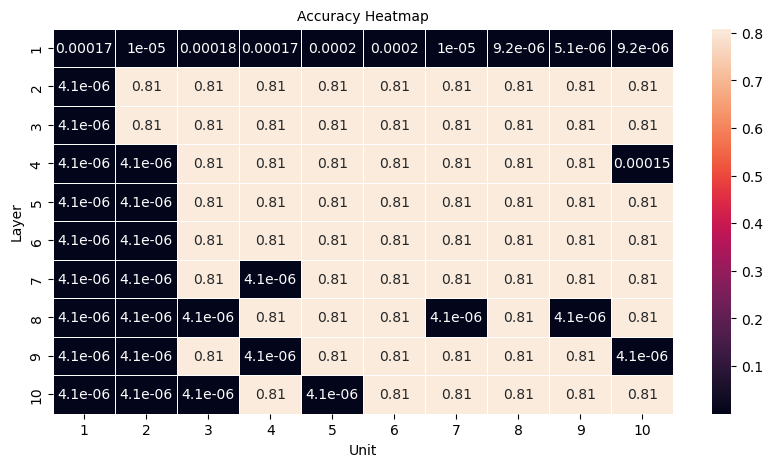

In [17]:
xlabels = range(1, max_range_unit)
ylabels = range(1, max_range_layer)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(acc_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Accuracy Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

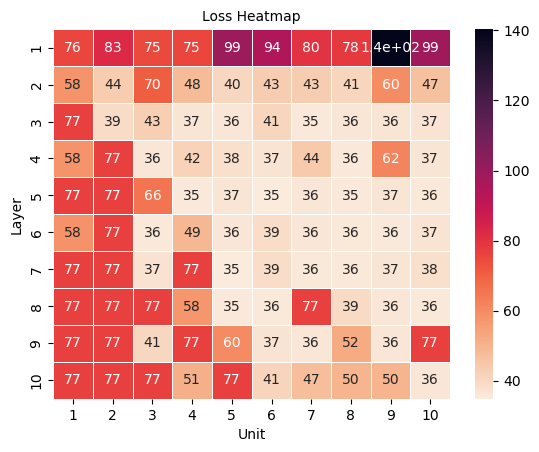

In [39]:
#fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(loss_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, cmap='rocket_r')
ax.set_title('Loss Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

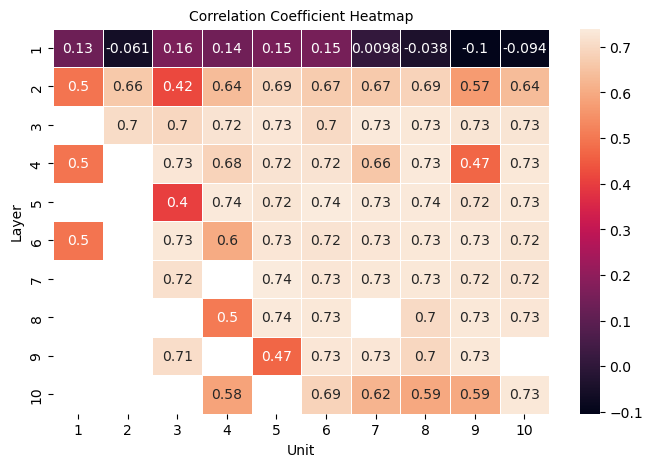

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(coef_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Correlation Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

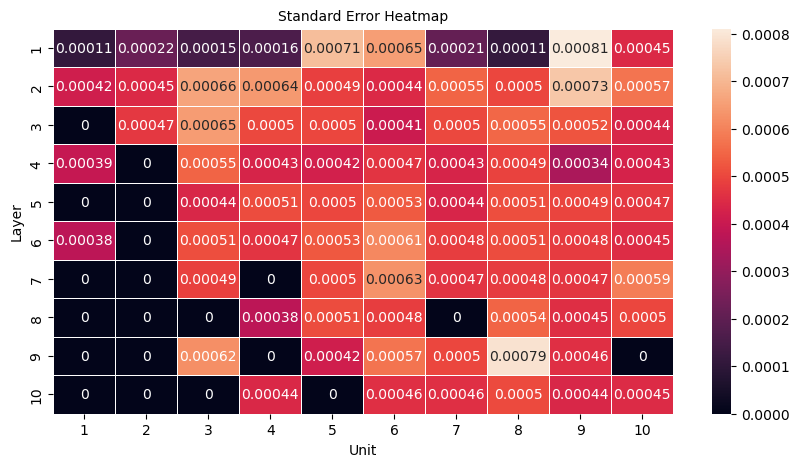

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err_arr, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [31]:
div = np.divide(coef_arr,err_arr)
div = np.nan_to_num(div)

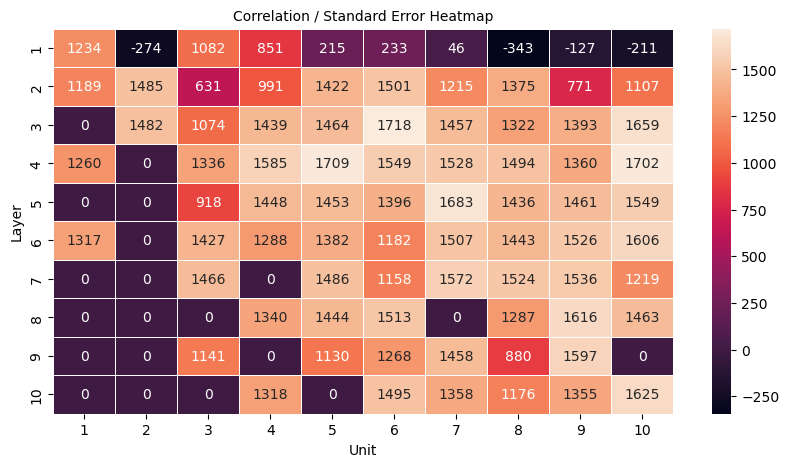

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(div.astype(int), linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt='d')
ax.set_title('Correlation / Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [34]:
div2 = np.divide(div, loss_arr)

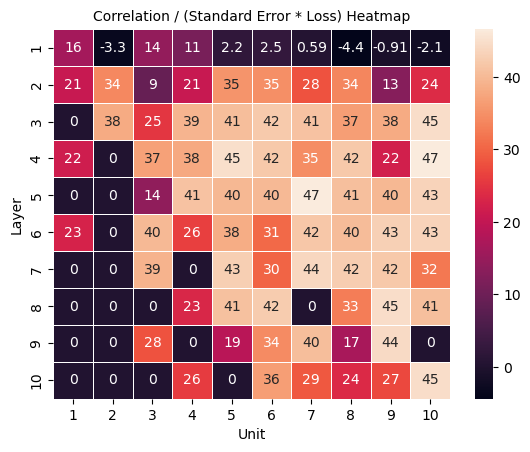

In [38]:
# fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(div2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Correlation / (Standard Error * Loss) Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

### Different unit size

In [273]:
def create_different_unit_nn(layer_size, unit_sizes):
    model = keras.Sequential()
    for i in range(1, layer_size):
        if i == 1:
            model.add(Dense(unit_sizes[0], activation='relu', input_shape=(len(X_train[0]),)))
        else:
            model.add(Dense(unit_sizes[i-1], activation='relu'))
    
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)
    
    y_predict = model.predict(X_test)
    evaluate = model.evaluate(X_test, y_test)
    corr = np.corrcoef(y_predict.flatten(), y_test)
    m, b, r, p, st_er = stats.linregress(y_test.flatten(), y_predict.flatten()) 
    
    loss = evaluate[0]
    acc = evaluate[1]
    coef = corr[0][1]
    
    return acc, loss, coef, st_er

In [288]:
max_range_layer = 11
max_range_unit = 11
acc_arr2 = []
loss_arr2 = []
coef_arr2 = []
err_arr2 = []
size_arr2 = []
for i in range(3, max_range_layer):
    acc_unit = []
    loss_unit = []
    coef_unit = []
    err_unit = []
    size_unit = []
    for j in range(1, max_range_unit):
        idx = 0
        sub = j / i
        units = []
        for l in range(j, i):
            units.append(j)

        for k in range(j, 0, -1):
            if k == j: 
                unit = k
            elif idx == i:
                break
            else:
                unit = int(unit - sub)

            if unit < 1:
                unit = 1
            units.append(unit)
            idx = idx+1

        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        acc, loss, coef, err = create_different_unit_nn(i, units)
        acc_unit.append(acc)
        loss_unit.append(loss)
        coef_unit.append(coef)
        err_unit.append(err)
        size_unit(units)
    
    acc_arr2.append(acc_unit)
    loss_arr2.append(loss_unit)
    coef_arr2.append(coef_unit)
    err_arr2.append(err_unit)
    size_arr2.append(size_unit)

##### Layer:3 Unit:1 #####
Epoch 1/100
28160/28160 [==============================] - 30s 1ms/step - loss: 82.3526 - accuracy: 0.0904 - val_loss: 47.7263 - val_accuracy: 5.5487e-06
Epoch 2/100
28160/28160 [==============================] - 29s 1ms/step - loss: 40.7908 - accuracy: 5.5487e-06 - val_loss: 47.1735 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 33s 1ms/step - loss: 40.8579 - accuracy: 5.5487e-06 - val_loss: 47.2789 - val_accuracy: 5.5487e-06
Epoch 4/100
28160/28160 [==============================] - 30s 1ms/step - loss: 40.7323 - accuracy: 5.5487e-06 - val_loss: 47.2703 - val_accuracy: 5.5487e-06
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 40.8503 - accuracy: 5.5487e-06 - val_loss: 47.2838 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 31s 1ms/step - loss: 40.8853 - accuracy: 5.5487e-06 - val_loss: 47.5960 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [====

28160/28160 [==============================] - 30s 1ms/step - loss: 18.0804 - accuracy: 0.4067 - val_loss: 18.7812 - val_accuracy: 0.8114
Epoch 7/100
28160/28160 [==============================] - 26s 928us/step - loss: 18.7898 - accuracy: 0.6534 - val_loss: 14.9118 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 1825s 65ms/step - loss: 15.8776 - accuracy: 0.6411 - val_loss: 17.0777 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 26s 939us/step - loss: 14.0130 - accuracy: 0.8114 - val_loss: 13.3281 - val_accuracy: 0.8114
Epoch 10/100
28160/28160 [==============================] - 924s 33ms/step - loss: 14.5508 - accuracy: 0.7401 - val_loss: 14.4592 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 26s 910us/step - loss: 13.8873 - accuracy: 0.8114 - val_loss: 13.6286 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 27s 942us/step - loss: 13.4420 - accura

28160/28160 [==============================] - 28s 977us/step - loss: 12.0501 - accuracy: 0.8114 - val_loss: 11.8449 - val_accuracy: 0.8114
Epoch 9/100
28160/28160 [==============================] - 28s 1ms/step - loss: 12.1363 - accuracy: 0.8114 - val_loss: 12.7538 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 28s 979us/step - loss: 11.9761 - accuracy: 0.8114 - val_loss: 11.7755 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 27s 963us/step - loss: 11.8840 - accuracy: 0.8114 - val_loss: 11.8231 - val_accuracy: 0.8112
Epoch 12/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.9246 - accuracy: 0.8114 - val_loss: 12.2749 - val_accuracy: 0.8114
Epoch 13/100
5632/5632 [==============================] - 4s 759us/step - loss: 11.8164 - accuracy: 0.8114
##### Layer:4 Unit:5 #####
Epoch 1/100
28160/28160 [==============================] - 27s 954us/step - loss: 10275.0479 - accuracy: 0.2450 - val_l

28160/28160 [==============================] - 1126s 40ms/step - loss: 15.5145 - accuracy: 0.8113 - val_loss: 15.4497 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 27s 949us/step - loss: 13.7325 - accuracy: 0.8113 - val_loss: 14.2192 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 27s 967us/step - loss: 12.4976 - accuracy: 0.8112 - val_loss: 13.1986 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 555s 20ms/step - loss: 12.6067 - accuracy: 0.8112 - val_loss: 12.4234 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.1778 - accuracy: 0.8110 - val_loss: 12.0861 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.0679 - accuracy: 0.8112 - val_loss: 14.7665 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 28s 1ms/step - loss: 11.7176 - accuracy: 0.8

28160/28160 [==============================] - 29s 1ms/step - loss: 12.3602 - accuracy: 0.8113 - val_loss: 13.1564 - val_accuracy: 0.8114
Epoch 8/100
28160/28160 [==============================] - 29s 1ms/step - loss: 12.2229 - accuracy: 0.8111 - val_loss: 11.2359 - val_accuracy: 0.8112
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.8366 - accuracy: 0.8113 - val_loss: 11.4466 - val_accuracy: 0.8112
Epoch 10/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.6033 - accuracy: 0.8113 - val_loss: 12.2527 - val_accuracy: 0.8114
Epoch 11/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4801 - accuracy: 0.8112 - val_loss: 10.9577 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.5032 - accuracy: 0.8113 - val_loss: 11.8089 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 29s 1ms/step - loss: 11.4582 - accuracy: 0.8113 -

Epoch 10/100
28160/28160 [==============================] - 38s 1ms/step - loss: 11.7218 - accuracy: 0.8114 - val_loss: 12.8822 - val_accuracy: 0.8112
Epoch 11/100
28160/28160 [==============================] - 39s 1ms/step - loss: 12.0761 - accuracy: 0.8113 - val_loss: 13.5324 - val_accuracy: 0.8112
Epoch 12/100
5632/5632 [==============================] - 7s 1ms/step - loss: 11.4044 - accuracy: 0.8112
##### Layer:6 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 42s 1ms/step - loss: 26.9500 - accuracy: 0.5179 - val_loss: 26.1151 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 42s 1ms/step - loss: 16.6773 - accuracy: 0.8112 - val_loss: 13.7098 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 39s 1ms/step - loss: 14.7945 - accuracy: 0.8112 - val_loss: 14.7303 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 36s 1ms/step - loss: 13.7194 - accuracy: 0.8087 - val_los

Epoch 5/100
28160/28160 [==============================] - 51s 2ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.7007 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6988 - accuracy: 5.5487e-06 - val_loss: 54.7001 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6991 - accuracy: 5.5487e-06 - val_loss: 54.6983 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 53s 2ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6965 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 53s 2ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.6963 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 52s 2ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6992 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [===========================

28160/28160 [==============================] - 30s 1ms/step - loss: 54.6995 - accuracy: 5.5487e-06 - val_loss: 54.6973 - val_accuracy: 5.5487e-06
Epoch 6/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.7011 - val_accuracy: 5.5487e-06
Epoch 7/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.7001 - val_accuracy: 5.5487e-06
Epoch 8/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6997 - accuracy: 5.5487e-06 - val_loss: 54.6965 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 29s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.7010 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 30s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6989 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 79

28160/28160 [==============================] - 32s 1ms/step - loss: 14.5835 - accuracy: 0.8107 - val_loss: 13.9292 - val_accuracy: 0.8114
Epoch 12/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.4296 - accuracy: 0.8107 - val_loss: 15.4259 - val_accuracy: 0.8114
Epoch 13/100
28160/28160 [==============================] - 31s 1ms/step - loss: 13.6122 - accuracy: 0.8112 - val_loss: 20.6199 - val_accuracy: 0.8114
Epoch 14/100
28160/28160 [==============================] - 30s 1ms/step - loss: 15.4682 - accuracy: 0.8109 - val_loss: 19.8791 - val_accuracy: 0.8112
Epoch 15/100
28160/28160 [==============================] - 31s 1ms/step - loss: 15.0370 - accuracy: 0.8113 - val_loss: 38.0089 - val_accuracy: 0.8114
Epoch 16/100
28160/28160 [==============================] - 31s 1ms/step - loss: 14.7497 - accuracy: 0.8113 - val_loss: 13.1482 - val_accuracy: 0.8112
Epoch 17/100
28160/28160 [==============================] - 30s 1ms/step - loss: 13.1384 - accuracy: 0.8112

28160/28160 [==============================] - 31s 1ms/step - loss: 54.6996 - accuracy: 5.5487e-06 - val_loss: 54.6969 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6993 - accuracy: 5.5487e-06 - val_loss: 54.6976 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 32s 1ms/step - loss: 54.6994 - accuracy: 5.5487e-06 - val_loss: 54.6991 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 4s 787us/step - loss: 54.6964 - accuracy: 5.5487e-06
##### Layer:9 Unit:4 #####
Epoch 1/100
28160/28160 [==============================] - 31s 1ms/step - loss: 24.3821 - accuracy: 0.5252 - val_loss: 16.5912 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 31s 1ms/step - loss: 13.0940 - accuracy: 0.8113 - val_loss: 12.3550 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.7025 - accuracy:

28160/28160 [==============================] - 31s 1ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6976 - val_accuracy: 5.5487e-06
Epoch 9/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6998 - accuracy: 5.5487e-06 - val_loss: 54.6991 - val_accuracy: 5.5487e-06
Epoch 10/100
28160/28160 [==============================] - 31s 1ms/step - loss: 54.6992 - accuracy: 5.5487e-06 - val_loss: 54.6997 - val_accuracy: 5.5487e-06
Epoch 11/100
5632/5632 [==============================] - 5s 803us/step - loss: 54.6966 - accuracy: 5.5487e-06
##### Layer:9 Unit:8 #####
Epoch 1/100
28160/28160 [==============================] - 32s 1ms/step - loss: 22.2618 - accuracy: 0.6168 - val_loss: 11.8126 - val_accuracy: 0.8114
Epoch 2/100
28160/28160 [==============================] - 32s 1ms/step - loss: 13.6988 - accuracy: 0.8047 - val_loss: 20.8246 - val_accuracy: 0.8114
Epoch 3/100
28160/28160 [==============================] - 31s 1ms/step - loss: 12.1737 - accuracy:

5632/5632 [==============================] - 5s 837us/step - loss: 54.6978 - accuracy: 5.5487e-06
##### Layer:10 Unit:6 #####
Epoch 1/100
28160/28160 [==============================] - 33s 1ms/step - loss: 25.9155 - accuracy: 0.7380 - val_loss: 18.8334 - val_accuracy: 0.8112
Epoch 2/100
28160/28160 [==============================] - 32s 1ms/step - loss: 14.1379 - accuracy: 0.8113 - val_loss: 11.1160 - val_accuracy: 0.8112
Epoch 3/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.7977 - accuracy: 0.8112 - val_loss: 12.0923 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 33s 1ms/step - loss: 13.0226 - accuracy: 0.8112 - val_loss: 11.1222 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.7506 - accuracy: 0.8112 - val_loss: 15.7952 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 32s 1ms/step - loss: 12.2268 - accuracy: 0.8112 - val_loss: 13.87

28160/28160 [==============================] - 33s 1ms/step - loss: 14.5054 - accuracy: 0.7804 - val_loss: 14.7246 - val_accuracy: 5.5487e-06
Epoch 3/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.2041 - accuracy: 0.7836 - val_loss: 11.3268 - val_accuracy: 0.8112
Epoch 4/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.4589 - accuracy: 0.8016 - val_loss: 11.1238 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 33s 1ms/step - loss: 12.4015 - accuracy: 0.7966 - val_loss: 10.7455 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 33s 1ms/step - loss: 14.1058 - accuracy: 0.7906 - val_loss: 11.5228 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 33s 1ms/step - loss: 14.0696 - accuracy: 0.7941 - val_loss: 13.5147 - val_accuracy: 0.8112
Epoch 8/100
28160/28160 [==============================] - 33s 1ms/step - loss: 11.8816 - accuracy: 0.7976 -

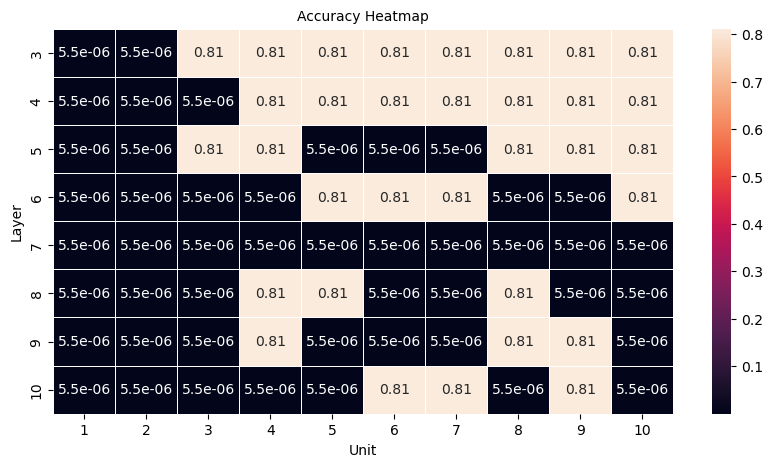

In [289]:
xlabels = range(1, max_range_unit)
ylabels = range(3, max_range_layer)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(acc_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Accuracy Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

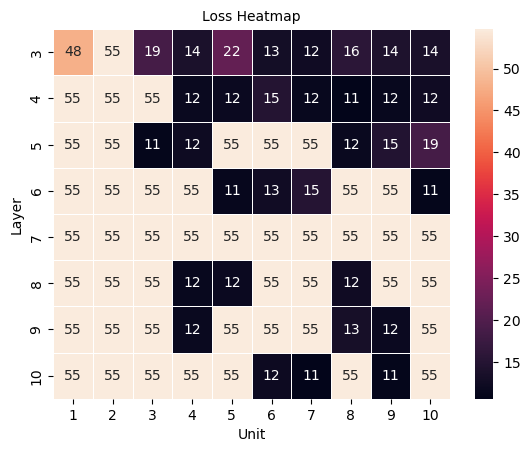

In [290]:
ax = sns.heatmap(loss_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Loss Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

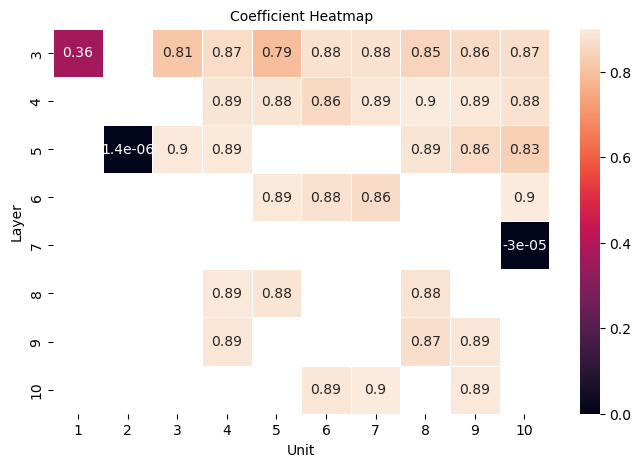

In [291]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(coef_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Coefficient Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

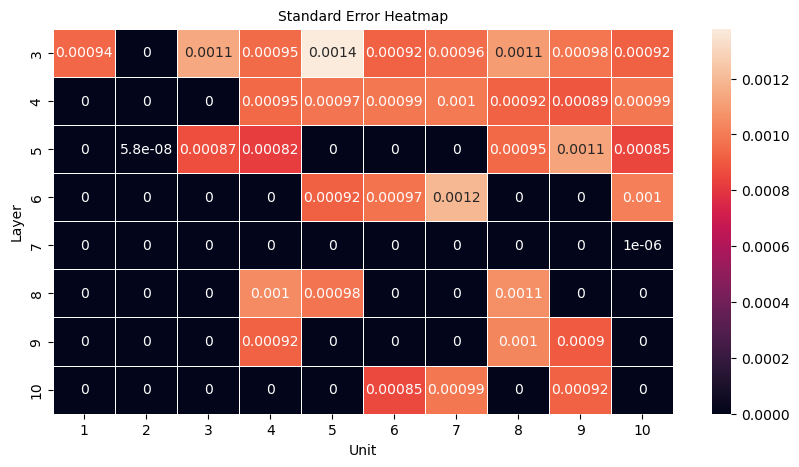

In [292]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(err_arr2, linewidth=0.5, xticklabels=xlabels, yticklabels=ylabels, annot=True)
ax.set_title('Standard Error Heatmap', fontsize=10)
ax.set_xlabel('Unit', fontsize=10)
ax.set_ylabel('Layer', fontsize=10)
plt.show()

In [383]:
max_range_layer = 11
max_range_unit = 11
size_arr2 = []
for i in range(3, max_range_layer):
    size_unit = []
    for j in range(1, max_range_unit):
        idx = 0
        sub = j / i
        units = []
        for l in range(j, i):
            units.append(j)

        for k in range(j, 0, -1):
            if k == j: 
                unit = k
            elif idx == i:
                break
            else:
                unit = int(unit - sub)

            if unit < 1:
                unit = 1
            units.append(unit)
            idx = idx+1

        print("##### Layer:"+str(i)+" Unit:"+str(j)+" #####")
        print(units)
        size_unit.append(units)
    
    size_arr2.append(size_unit)

##### Layer:3 Unit:1 #####
[1, 1, 1]
##### Layer:3 Unit:2 #####
[2, 2, 1]
##### Layer:3 Unit:3 #####
[3, 2, 1]
##### Layer:3 Unit:4 #####
[4, 2, 1]
##### Layer:3 Unit:5 #####
[5, 3, 1]
##### Layer:3 Unit:6 #####
[6, 4, 2]
##### Layer:3 Unit:7 #####
[7, 4, 1]
##### Layer:3 Unit:8 #####
[8, 5, 2]
##### Layer:3 Unit:9 #####
[9, 6, 3]
##### Layer:3 Unit:10 #####
[10, 6, 2]
##### Layer:4 Unit:1 #####
[1, 1, 1, 1]
##### Layer:4 Unit:2 #####
[2, 2, 2, 1]
##### Layer:4 Unit:3 #####
[3, 3, 2, 1]
##### Layer:4 Unit:4 #####
[4, 3, 2, 1]
##### Layer:4 Unit:5 #####
[5, 3, 1, 1]
##### Layer:4 Unit:6 #####
[6, 4, 2, 1]
##### Layer:4 Unit:7 #####
[7, 5, 3, 1]
##### Layer:4 Unit:8 #####
[8, 6, 4, 2]
##### Layer:4 Unit:9 #####
[9, 6, 3, 1]
##### Layer:4 Unit:10 #####
[10, 7, 4, 1]
##### Layer:5 Unit:1 #####
[1, 1, 1, 1, 1]
##### Layer:5 Unit:2 #####
[2, 2, 2, 2, 1]
##### Layer:5 Unit:3 #####
[3, 3, 3, 2, 1]
##### Layer:5 Unit:4 #####
[4, 4, 3, 2, 1]
##### Layer:5 Unit:5 #####
[5, 4, 3, 2, 1]
##### Layer

In [384]:
size_arr2

[[[1, 1, 1],
  [2, 2, 1],
  [3, 2, 1],
  [4, 2, 1],
  [5, 3, 1],
  [6, 4, 2],
  [7, 4, 1],
  [8, 5, 2],
  [9, 6, 3],
  [10, 6, 2]],
 [[1, 1, 1, 1],
  [2, 2, 2, 1],
  [3, 3, 2, 1],
  [4, 3, 2, 1],
  [5, 3, 1, 1],
  [6, 4, 2, 1],
  [7, 5, 3, 1],
  [8, 6, 4, 2],
  [9, 6, 3, 1],
  [10, 7, 4, 1]],
 [[1, 1, 1, 1, 1],
  [2, 2, 2, 2, 1],
  [3, 3, 3, 2, 1],
  [4, 4, 3, 2, 1],
  [5, 4, 3, 2, 1],
  [6, 4, 2, 1, 1],
  [7, 5, 3, 1, 1],
  [8, 6, 4, 2, 1],
  [9, 7, 5, 3, 1],
  [10, 8, 6, 4, 2]],
 [[1, 1, 1, 1, 1, 1],
  [2, 2, 2, 2, 2, 1],
  [3, 3, 3, 3, 2, 1],
  [4, 4, 4, 3, 2, 1],
  [5, 5, 4, 3, 2, 1],
  [6, 5, 4, 3, 2, 1],
  [7, 5, 3, 1, 1, 1],
  [8, 6, 4, 2, 1, 1],
  [9, 7, 5, 3, 1, 1],
  [10, 8, 6, 4, 2, 1]],
 [[1, 1, 1, 1, 1, 1, 1],
  [2, 2, 2, 2, 2, 2, 1],
  [3, 3, 3, 3, 3, 2, 1],
  [4, 4, 4, 4, 3, 2, 1],
  [5, 5, 5, 4, 3, 2, 1],
  [6, 6, 5, 4, 3, 2, 1],
  [7, 6, 5, 4, 3, 2, 1],
  [8, 6, 4, 2, 1, 1, 1],
  [9, 7, 5, 3, 1, 1, 1],
  [10, 8, 6, 4, 2, 1, 1]],
 [[1, 1, 1, 1, 1, 1, 1, 1],
  [2, 2, 2, 

## Find out Hyper paramater 

In [64]:
# Use best layer and unit
shape = (len(X_train[0]),)
def create_model(optimizer="adam"):
    model = keras.Sequential()
    model.add(Dense(8, activation='relu', input_shape=shape)) 
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mse', metrics=["accuracy"])
    return model

### Epoch

In [71]:
estimator = KerasRegressor(model=create_model, verbose=1)

In [72]:

# define the grid search parameters
param_grid = {
    'epochs': [100, 250, 500]
}

In [73]:
grid1 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)

In [74]:
grid1_result = grid1.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


2022-11-02 14:19:21.391038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 14:19:21.391114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 14:19:21.392767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/250
Epoch 1/250
14080/14080 [==============================] - 20s 1ms/step - loss: 192.1774 - accuracy: 0.3374
Epoch 2/250
14080/14080 [==============================] - 20s 1ms/step - loss: 39.0216 - accuracy: 0.3349
Epoch 2/250
14080/14080 [==============================] - 20s 1ms/step - loss: 84.6073 - accuracy: 0.6539
Epoch 2/100
14080/14080 [==============================] - 20s 1ms/step - loss: 64.2614 - accuracy: 0.6282
Epoch 2/100
14080/14080 [==============================] - 19s 1ms/step - loss: 27.7406 - accuracy: 0.8115
Epoch 3/250
14080/14080 [==============================] - 19s 1ms/step - loss: 21.9598 - accuracy: 0.8094
Epoch 3/100
14080/14080 [==============================] - 19s 1ms/step - loss: 26.4712 - accuracy: 0.7823
Epoch 3/100
14080/14080 [==============================] - 19s 1ms/step - loss: 23.4687 - accuracy: 0.8115
Epoch 4/250
14080/14080 [==============================] - 19s 1ms/step - loss: 13.1862 - accuracy: 0.8110


14080/14080 [==============================] - 22s 2ms/step - loss: 11.2894 - accuracy: 0.8095===============>......] - ETA: 4s - loss: 11.4825 -
Epoch 36/250
14080/14080 [==============================] - 22s 2ms/step - loss: 11.1369 - accuracy: 0.8100
Epoch 36/250
14080/14080 [==============================] - 21s 2ms/step - loss: 11.0811 - accuracy: 0.8094
Epoch 36/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.7748 - accuracy: 0.8098
Epoch 37/250
14080/14080 [==============================] - 19s 1ms/step - loss: 11.0164 - accuracy: 0.8081
Epoch 37/250
14080/14080 [==============================] - 19s 1ms/step - loss: 11.5126 - accuracy: 0.7750
Epoch 37/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.9989 - accuracy: 0.8110
Epoch 37/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.2287 - accuracy: 0.8089
Epoch 38/250
14080/14080 [==============================] - 19s 1ms/step - loss: 11.2972 - accurac

14080/14080 [==============================] - 28s 2ms/step - loss: 10.9050 - accuracy: 0.8100] - ETA: 18s - loss: 10.1611 - accuracy: 0.8101................] - ETA: 17s - loss: 9.7365 - accuracy: 0.810287 - accuracy: 0.7890 [=========>....................] - ETA: 17s - loss: 9.7407 - accuracy: 0.81 - accuracy: 0.7ETA: 15s - loss: 10.5743 - accuracy: 0.8080 [============>.................] - ETA: 15s - loss: 11.2679 - accuracy: 0. 24s - loss: 14.4018 - accuracy: 0.804y: 0.81==>..........................] - ETA: 24s - loss: 13.6564 - accuracy: 0. 10.8893 - accuracy: 0.80930/14080 [==================>...........] - ETA: 9s - loss: 10.8674 - accuracy: 0.881..................] - ETA: 23s - loss: 13.6742 - accuracy: 0.80 10.7396 - accuracy: 0.81124/14080 [=====>........................] - ETA: 22s - loss: 13.6029 - accuracy: 0.==================>..] - ETA: 1s - loss: 10.9975 - accuracy: 0.800.81=================>.] - ETA: 0s - loss: 10.9449 - accuracy: 0.80
Epoch 84/100
14080/14080 [=======

14080/14080 [==============================] - 22s 2ms/step - loss: 10.9310 - accuracy: 0.8072
Epoch 100/100
14080/14080 [==============================] - 22s 2ms/step - loss: 10.5963 - accuracy: 0.8103
Epoch 100/100
14080/14080 [==============================] - 21s 2ms/step - loss: 11.2433 - accuracy: 0.8087
Epoch 101/250
14080/14080 [==============================] - 21s 2ms/step - loss: 10.6408 - accuracy: 0.8094
Epoch 101/250
14080/14080 [==============================] - 22s 2ms/step - loss: 11.3492 - accuracy: 0.8093
Epoch 102/250
14080/14080 [==============================] - 22s 2ms/step - loss: 10.6412 - accuracy: 0.8099
Epoch 102/250
14080/14080 [==============================] - 21s 2ms/step - loss: 11.3043 - accuracy: 0.8110
Epoch 103/250
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6202 - accuracy: 0.8080
Epoch 103/250
14080/14080 [==============================] - 17s 1ms/step - loss: 11.5200 - accuracy: 0.8100
Epoch 104/250
14080/14080 [======

14080/14080 [==============================] - 22s 2ms/step - loss: 10.6038 - accuracy: 0.8075
Epoch 117/250
14080/14080 [==============================] - 22s 2ms/step - loss: 11.4106 - accuracy: 0.8090
Epoch 13/500
14080/14080 [==============================] - 21s 1ms/step - loss: 12.8597 - accuracy: 0.8116
Epoch 15/500
14080/14080 [==============================] - 21s 1ms/step - loss: 11.2960 - accuracy: 0.8115
Epoch 118/250
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6120 - accuracy: 0.8087
Epoch 118/250
14080/14080 [==============================] - 20s 1ms/step - loss: 11.4175 - accuracy: 0.8043
Epoch 14/500
14080/14080 [==============================] - 20s 1ms/step - loss: 11.3530 - accuracy: 0.8096
Epoch 119/250
14080/14080 [==============================] - 20s 1ms/step - loss: 12.7544 - accuracy: 0.8107
Epoch 16/500
14080/14080 [==============================] - 20s 1ms/step - loss: 10.5586 - accuracy: 0.8074
Epoch 119/250
14080/14080 [==========

14080/14080 [==============================] - 21s 2ms/step - loss: 11.0581 - accuracy: 0.8093
Epoch 166/250
14080/14080 [==============================] - 21s 1ms/step - loss: 10.5659 - accuracy: 0.8057
Epoch 166/250
14080/14080 [==============================] - 21s 2ms/step - loss: 10.5949 - accuracy: 0.8110
Epoch 61/500
14080/14080 [==============================] - 21s 2ms/step - loss: 11.4759 - accuracy: 0.8115
Epoch 63/500
14080/14080 [==============================] - 21s 2ms/step - loss: 11.0479 - accuracy: 0.8089
Epoch 167/250
14080/14080 [==============================] - 22s 2ms/step - loss: 10.5040 - accuracy: 0.8072===========>..........] - ETA: 7s - loss: 11.6176 - accuracy:
Epoch 167/250
14080/14080 [==============================] - 22s 2ms/step - loss: 11.2057 - accuracy: 0.8110
Epoch 62/500
14080/14080 [==============================] - 22s 2ms/step - loss: 11.4513 - accuracy: 0.8115
Epoch 64/500
14080/14080 [==============================] - 22s 2ms/step - loss: 10.

14080/14080 [==============================] - 20s 1ms/step - loss: 10.9657 - accuracy: 0.8110=======================>....] - ETA: 2s - loss: 10.6763 -
Epoch 183/250
14080/14080 [==============================] - 21s 1ms/step - loss: 10.5852 - accuracy: 0.8074
Epoch 183/250
14080/14080 [==============================] - 21s 1ms/step - loss: 11.5184 - accuracy: 0.8115
Epoch 80/500
14080/14080 [==============================] - 21s 1ms/step - loss: 10.6262 - accuracy: 0.8110
Epoch 78/500
14080/14080 [==============================] - 20s 1ms/step - loss: 11.1025 - accuracy: 0.8093
Epoch 184/250
14080/14080 [==============================] - 21s 1ms/step - loss: 10.6810 - accuracy: 0.8063
Epoch 184/250
14080/14080 [==============================] - 21s 1ms/step - loss: 11.2298 - accuracy: 0.8115
Epoch 81/500
14080/14080 [==============================] - 21s 2ms/step - loss: 10.5260 - accuracy: 0.8110
Epoch 79/500
14080/14080 [==============================] - 21s 1ms/step - loss: 10.9927

14080/14080 [==============================] - 21s 1ms/step - loss: 10.7718 - accuracy: 0.8106
Epoch 218/250
14080/14080 [==============================] - 21s 2ms/step - loss: 11.2226 - accuracy: 0.8101
Epoch 114/500
14080/14080 [==============================] - 21s 1ms/step - loss: 10.4728 - accuracy: 0.8103
Epoch 218/250
14080/14080 [==============================] - 21s 2ms/step - loss: 14.1309 - accuracy: 0.8110
Epoch 112/500
14080/14080 [==============================] - 21s 1ms/step - loss: 10.7747 - accuracy: 0.8095
Epoch 219/250
14080/14080 [==============================] - 21s 1ms/step - loss: 11.3920 - accuracy: 0.8102
Epoch 115/500
14080/14080 [==============================] - 21s 1ms/step - loss: 10.4408 - accuracy: 0.8108
Epoch 219/250
14080/14080 [==============================] - 21s 2ms/step - loss: 11.3630 - accuracy: 0.8103
Epoch 113/500
14080/14080 [==============================] - 21s 1ms/step - loss: 10.9975 - accuracy: 0.8095
Epoch 220/250
14080/14080 [======

14080/14080 [==============================] - 14s 1ms/step - loss: 12.4654 - accuracy: 0.8102
Epoch 151/500
14080/14080 [==============================] - 14s 1ms/step - loss: 10.5739 - accuracy: 0.8110
Epoch 149/500
14080/14080 [==============================] - 14s 1ms/step - loss: 11.3874 - accuracy: 0.8106
Epoch 152/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.3861 - accuracy: 0.8110
Epoch 150/500
14080/14080 [==============================] - 15s 1ms/step - loss: 11.5717 - accuracy: 0.8090
Epoch 153/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.6528 - accuracy: 0.8110
Epoch 151/500
14080/14080 [==============================] - 14s 1ms/step - loss: 10.9674 - accuracy: 0.8104
Epoch 154/500
14080/14080 [==============================] - 14s 1ms/step - loss: 10.8728 - accuracy: 0.8110
Epoch 152/500
14080/14080 [==============================] - 14s 1ms/step - loss: 11.7232 - accuracy: 0.8097
Epoch 155/500
14080/14080 [======

14080/14080 [==============================] - 15s 1ms/step - loss: 10.4713 - accuracy: 0.8110
Epoch 221/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.9489 - accuracy: 0.8094
Epoch 224/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.3690 - accuracy: 0.8110
Epoch 222/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.6958 - accuracy: 0.8108
Epoch 225/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.4022 - accuracy: 0.8110
Epoch 223/500
14080/14080 [==============================] - 15s 1ms/step - loss: 12.1833 - accuracy: 0.8108
Epoch 226/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.2907 - accuracy: 0.8110
Epoch 224/500
14080/14080 [==============================] - 15s 1ms/step - loss: 13.4360 - accuracy: 0.8113
Epoch 227/500
14080/14080 [==============================] - 15s 1ms/step - loss: 10.3486 - accuracy: 0.8110
Epoch 225/500
14080/14080 [======

14080/14080 [==============================] - 23s 2ms/step - loss: 10.5080 - accuracy: 0.8110
Epoch 295/500
14080/14080 [==============================] - 23s 2ms/step - loss: 10.9272 - accuracy: 0.8103
Epoch 299/500
14080/14080 [==============================] - 23s 2ms/step - loss: 10.5110 - accuracy: 0.8110
Epoch 296/500
14080/14080 [==============================] - 22s 2ms/step - loss: 10.6819 - accuracy: 0.8115
Epoch 300/500
14080/14080 [==============================] - 22s 2ms/step - loss: 10.6104 - accuracy: 0.8110
Epoch 297/500
14080/14080 [==============================] - 22s 2ms/step - loss: 10.4373 - accuracy: 0.8110
Epoch 298/500
14080/14080 [==============================] - 22s 2ms/step - loss: 10.6429 - accuracy: 0.8115
Epoch 302/500
14080/14080 [==============================] - 22s 2ms/step - loss: 10.5149 - accuracy: 0.8110
Epoch 299/500
14080/14080 [==============================] - 22s 2ms/step - loss: 10.7823 - accuracy: 0.8115
Epoch 303/500
14080/14080 [======

14080/14080 [==============================] - 13s 913us/step - loss: 10.6628 - accuracy: 0.8110
Epoch 331/500
14080/14080 [==============================] - 13s 910us/step - loss: 11.4765 - accuracy: 0.8009
Epoch 335/500
14080/14080 [==============================] - 13s 951us/step - loss: 10.2559 - accuracy: 0.8110
Epoch 332/500
14080/14080 [==============================] - 14s 968us/step - loss: 11.0261 - accuracy: 0.8108
Epoch 336/500
14080/14080 [==============================] - 13s 939us/step - loss: 10.3769 - accuracy: 0.8104
Epoch 333/500
14080/14080 [==============================] - 13s 934us/step - loss: 11.7900 - accuracy: 0.8072
Epoch 337/500
14080/14080 [==============================] - 13s 947us/step - loss: 10.3450 - accuracy: 0.8110
Epoch 334/500
14080/14080 [==============================] - 13s 928us/step - loss: 11.1685 - accuracy: 0.8105
Epoch 338/500
14080/14080 [==============================] - 13s 917us/step - loss: 15.0131 - accuracy: 0.8110
Epoch 335/500
1

14080/14080 [==============================] - 14s 996us/step - loss: 10.2076 - accuracy: 0.8107
Epoch 404/500
14080/14080 [==============================] - 13s 952us/step - loss: 12.3141 - accuracy: 0.8115
Epoch 408/500
14080/14080 [==============================] - 13s 928us/step - loss: 10.2207 - accuracy: 0.8110
Epoch 405/500
14080/14080 [==============================] - 13s 924us/step - loss: 14.1352 - accuracy: 0.8059
Epoch 409/500
14080/14080 [==============================] - 13s 948us/step - loss: 10.2096 - accuracy: 0.8105
Epoch 406/500
14080/14080 [==============================] - 14s 959us/step - loss: 11.4382 - accuracy: 0.8054
Epoch 410/500
14080/14080 [==============================] - 14s 992us/step - loss: 10.2921 - accuracy: 0.8110
Epoch 407/500
14080/14080 [==============================] - 14s 971us/step - loss: 11.1774 - accuracy: 0.8019
Epoch 411/500
14080/14080 [==============================] - 13s 943us/step - loss: 10.3222 - accuracy: 0.8110
Epoch 408/500
1

14080/14080 [==============================] - 15s 1ms/step - loss: 10.8854 - accuracy: 0.8111
Epoch 444/500
14080/14080 [==============================] - 14s 1ms/step - loss: 10.3717 - accuracy: 0.8110
Epoch 441/500
14080/14080 [==============================] - 14s 984us/step - loss: 10.9412 - accuracy: 0.8114
Epoch 445/500
14080/14080 [==============================] - 14s 960us/step - loss: 10.3601 - accuracy: 0.8110
Epoch 442/500
14080/14080 [==============================] - 13s 956us/step - loss: 10.7459 - accuracy: 0.8114
Epoch 446/500
14080/14080 [==============================] - 14s 980us/step - loss: 10.2164 - accuracy: 0.8110
Epoch 443/500
14080/14080 [==============================] - 14s 975us/step - loss: 10.9822 - accuracy: 0.8115
Epoch 447/500
14080/14080 [==============================] - 14s 969us/step - loss: 10.1908 - accuracy: 0.8103
Epoch 444/500
14080/14080 [==============================] - 14s 969us/step - loss: 10.9055 - accuracy: 0.8111
Epoch 448/500
14080

14080/14080 [==============================] - 13s 952us/step - loss: 10.3036 - accuracy: 0.8110
Epoch 477/500
14080/14080 [==============================] - 13s 954us/step - loss: 10.7551 - accuracy: 0.8109
Epoch 482/500
14080/14080 [==============================] - 14s 960us/step - loss: 10.2822 - accuracy: 0.8110
Epoch 478/500
14080/14080 [==============================] - 14s 992us/step - loss: 10.2025 - accuracy: 0.8110
Epoch 479/500
14080/14080 [==============================] - 13s 935us/step - loss: 10.9684 - accuracy: 0.7985
Epoch 484/500
14080/14080 [==============================] - 13s 939us/step - loss: 10.3851 - accuracy: 0.8110
Epoch 480/500
14080/14080 [==============================] - 13s 959us/step - loss: 11.1406 - accuracy: 0.8064
Epoch 485/500
14080/14080 [==============================] - 14s 964us/step - loss: 10.4741 - accuracy: 0.8110
Epoch 481/500
14080/14080 [==============================] - 13s 955us/step - loss: 10.7842 - accuracy: 0.8085
Epoch 486/500
1

28160/28160 [==============================] - 23s 829us/step - loss: 11.4606 - accuracy: 0.8047


In [75]:
# summarize results
print("Best: %f using %s" % (grid1_result.best_score_, grid1_result.best_params_))
means = grid1_result.cv_results_['mean_test_score']
stds = grid1_result.cv_results_['std_test_score']
params = grid1_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805596 using {'epochs': 100}
0.805596 (0.004645) with: {'epochs': 100}
0.803333 (0.006934) with: {'epochs': 250}
0.803944 (0.005506) with: {'epochs': 500}


In [76]:
grid1_result.cv_results_

{'mean_fit_time': array([2213.89021659, 5507.25137901, 8550.12374187]),
 'std_fit_time': array([ 4.01164365,  4.83091903, 14.04835296]),
 'mean_score_time': array([32.92256355, 29.81865394, 14.37926197]),
 'std_score_time': array([ 8.29583645, 11.50529301,  2.20264697]),
 'param_epochs': masked_array(data=[100, 250, 500],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'epochs': 100}, {'epochs': 250}, {'epochs': 500}],
 'split0_test_score': array([0.81024145, 0.81026643, 0.79843769]),
 'split1_test_score': array([0.80095049, 0.79639925, 0.80944963]),
 'mean_test_score': array([0.80559597, 0.80333284, 0.80394366]),
 'std_test_score': array([0.00464548, 0.00693359, 0.00550597]),
 'rank_test_score': array([1, 3, 2], dtype=int32),
 'split0_train_score': array([0.80454595, 0.81705466, 0.80546375]),
 'split1_train_score': array([0.81292269, 0.81431323, 0.81928946]),
 'mean_train_score': array([0.80873432, 0.81568395, 0.8123766 ]),
 '

In [43]:

# define the grid search parameters
param_grid = {
    'epochs': [20, 50]
}

In [46]:
grid11 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)

In [ ]:
grid11_result = grid11.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


2022-11-01 19:09:56.529450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 19:09:56.530165: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 19:09:56.554463: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/250
Epoch 1/100
Epoch 1/250
Epoch 1/100
14080/14080 [==============================] - 22s 1ms/step - loss: 92.6393 - accuracy: 0.8055
Epoch 2/100
14080/14080 [==============================] - 22s 2ms/step - loss: 317.1476 - accuracy: 0.4926
Epoch 2/250
14080/14080 [==============================] - 22s 2ms/step - loss: 76.2175 - accuracy: 0.2159
Epoch 2/250
14080/14080 [==============================] - 22s 2ms/step - loss: 126.6556 - accuracy: 0.7419
Epoch 2/100
14080/14080 [==============================] - 20s 1ms/step - loss: 77.7713 - accuracy: 0.8055========>.............] - ETA: 8s - lo
Epoch 3/100
14080/14080 [==============================] - 20s 1ms/step - loss: 77.3663 - accuracy: 0.7195
Epoch 3/250
14080/14080 [==============================] - 20s 1ms/step - loss: 63.1671 - accuracy: 0.7872
Epoch 3/250
14080/14080 [==============================] - 20s 1ms/step - loss: 64.4358 - accuracy: 0.8074
Epoch 3/100
14080/14080 [==============================] - 21s 1ms/s

14080/14080 [==============================] - 20s 1ms/step - loss: 58.4519 - accuracy: 0.7395
Epoch 19/100
14080/14080 [==============================] - 19s 1ms/step - loss: 72.2799 - accuracy: 0.7968
Epoch 20/100
14080/14080 [==============================] - 19s 1ms/step - loss: 71.9955 - accuracy: 0.7668
Epoch 20/250
14080/14080 [==============================] - 19s 1ms/step - loss: 70.7040 - accuracy: 0.2162
Epoch 20/250
14080/14080 [==============================] - 20s 1ms/step - loss: 80.0258 - accuracy: 0.4346
Epoch 20/100
14080/14080 [==============================] - 19s 1ms/step - loss: 70.8885 - accuracy: 0.8017
Epoch 21/100
14080/14080 [==============================] - 19s 1ms/step - loss: 57.4283 - accuracy: 0.8074
Epoch 21/250
14080/14080 [==============================] - 20s 1ms/step - loss: 74.6219 - accuracy: 0.7040
Epoch 21/250
14080/14080 [==============================] - 20s 1ms/step - loss: 76.6191 - accuracy: 0.8065
Epoch 21/100
14080/14080 [===============

14080/14080 [==============================] - 20s 1ms/step - loss: 55.9718 - accuracy: 0.7993
Epoch 55/100
14080/14080 [==============================] - 19s 1ms/step - loss: 67.8254 - accuracy: 0.6991
Epoch 56/100
14080/14080 [==============================] - 19s 1ms/step - loss: 71.2900 - accuracy: 0.8046
Epoch 56/250
14080/14080 [==============================] - 19s 1ms/step - loss: 57.2710 - accuracy: 0.7452
Epoch 56/250
14080/14080 [==============================] - 20s 1ms/step - loss: 55.7115 - accuracy: 0.8005
Epoch 56/100
14080/14080 [==============================] - 19s 1ms/step - loss: 71.3545 - accuracy: 0.7363
Epoch 57/100
14080/14080 [==============================] - 19s 1ms/step - loss: 59.1300 - accuracy: 0.7765
Epoch 57/250
14080/14080 [==============================] - 19s 1ms/step - loss: 71.7022 - accuracy: 0.7948
Epoch 57/250
14080/14080 [==============================] - 19s 1ms/step - loss: 57.1032 - accuracy: 0.7672
Epoch 57/100
14080/14080 [===============

14080/14080 [==============================] - 20s 1ms/step - loss: 56.5527 - accuracy: 0.7483
Epoch 91/250
14080/14080 [==============================] - 20s 1ms/step - loss: 67.3865 - accuracy: 0.7420
Epoch 92/100
14080/14080 [==============================] - 20s 1ms/step - loss: 52.4369 - accuracy: 0.7634
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 67.3339 - accuracy: 0.7777
Epoch 92/250
14080/14080 [==============================] - 20s 1ms/step - loss: 59.0809 - accuracy: 0.7499
Epoch 92/250
14080/14080 [==============================] - 20s 1ms/step - loss: 66.8779 - accuracy: 0.7413
Epoch 93/100
14080/14080 [==============================] - 20s 1ms/step - loss: 52.8696 - accuracy: 0.7509
Epoch 92/100
14080/14080 [==============================] - 20s 1ms/step - loss: 69.7529 - accuracy: 0.7631
Epoch 93/250
14080/14080 [==============================] - 20s 1ms/step - loss: 62.7878 - accuracy: 0.7695
Epoch 93/250
14080/14080 [===============

14080/14080 [==============================] - 20s 1ms/step - loss: 55.8910 - accuracy: 0.7725
Epoch 127/250
14080/14080 [==============================] - 20s 1ms/step - loss: 75.5782 - accuracy: 0.0347
Epoch 25/500
14080/14080 [==============================] - 20s 1ms/step - loss: 69.6496 - accuracy: 0.7916
Epoch 25/500
14080/14080 [==============================] - 20s 1ms/step - loss: 68.1344 - accuracy: 0.7495
Epoch 128/250
14080/14080 [==============================] - 20s 1ms/step - loss: 53.2596 - accuracy: 0.7281
Epoch 128/250
14080/14080 [==============================] - 20s 1ms/step - loss: 70.0135 - accuracy: 0.2932
Epoch 26/500
14080/14080 [==============================] - 20s 1ms/step - loss: 74.7649 - accuracy: 0.7861
Epoch 26/500
14080/14080 [==============================] - 20s 1ms/step - loss: 66.8117 - accuracy: 0.7130
Epoch 129/250
14080/14080 [==============================] - 20s 1ms/step - loss: 52.9229 - accuracy: 0.7402
Epoch 129/250
14080/14080 [==========

14080/14080 [==============================] - 20s 1ms/step - loss: 58.9286 - accuracy: 0.7764
Epoch 145/250
14080/14080 [==============================] - 20s 1ms/step - loss: 65.4195 - accuracy: 0.4067
Epoch 43/500
14080/14080 [==============================] - 20s 1ms/step - loss: 71.2906 - accuracy: 0.7388
Epoch 146/250
14080/14080 [==============================] - 20s 1ms/step - loss: 68.7970 - accuracy: 0.7567======================>....] - ETA: 2s - loss: 69.5444 -
Epoch 43/500
14080/14080 [==============================] - 20s 1ms/step - loss: 53.0948 - accuracy: 0.7796
Epoch 146/250
14080/14080 [==============================] - 19s 1ms/step - loss: 62.2429 - accuracy: 0.5550
Epoch 44/500
14080/14080 [==============================] - 19s 1ms/step - loss: 67.0335 - accuracy: 0.7342
Epoch 147/250
14080/14080 [==============================] - 20s 1ms/step - loss: 69.6466 - accuracy: 0.7415
Epoch 44/500
14080/14080 [==============================] - 19s 1ms/step - loss: 57.5025 

14080/14080 [==============================] - 34s 2ms/step - loss: 74.8946 - accuracy: 0.0919- ETA: 34s - loss: 7.4636 - accuracy: 0.876=>........] - ETA: 8s - loss: 79.4346 - accuracy: 0.uracy: 0.79080 [>.............................] - ETA: 31s - loss: 49.5966 - accuracy: 0.77.....] - ETA: 32s - loss: 44.0337 - accuracy: 0.[=====>........................] - ETA: 28s - loss: 76.4176 - accuracy: 0.78cy: 0.....] - ETA: 27s - loss: 57.1463 - accuracy: 0.7: 0.76=========================>...] - ETA: 3s - loss: 75.0864 - accuracy: 0.0loss: 53.5430 - accuracy: 0.........] - ETA: 25s - loss: 49.5013 - accuracy: 0.uracy: 0.79480 [===========================>..] - ETA: 1s - loss: 75.0901 - accuracy:...] - ETA: 11s - loss: 66.9184 - accuracy: 0.760
Epoch 62/500
14080/14080 [==============================] - 35s 2ms/step - loss: 65.3501 - accuracy: 0.7605cy: 0.8014080 [===========>..................] - ETA: 19s - loss: 51.6559 - accuracy: 0.A: 9s - loss: 69.1875 - accuracy: 0.76.............] - 

14080/14080 [==============================] - 32s 2ms/step - loss: 57.0861 - accuracy: 0.64810.6000 - accuracy: 0.0 [===>..........................] - ETA: 25s - loss: 68.5715 - accuracy: 0.
Epoch 70/500
14080/14080 [==============================] - 33s 2ms/step - loss: 64.6776 - accuracy: 0.7316TA: 8s - loss: 57.3100 - accuracy: 0.01/14080 [==>...........................] - ETA: 27s - loss: 28.7642 - accuracy: 0.806- ETA: 21s - loss: 65.3233 - accuracy: 0.780 [=========================>....] - ETA: 3s - loss: 68.1738 - accuracy: 0.72.....] - ETA: 26s - loss: 46.7984 - accuracy: 0.807459 - accuracy: 0.7796135/14080 [============>.................] - ETA: 19s - loss: 68.1017 - accuracy: 0.7 - ETA: 18s - loss: 69.5671 - accuracy: 0.749accuracy: 0.77/14080 [============>.................] - ETA: 18s - loss: 67.7724 - accuracy: 0.751A: 1s - loss: 66.4748 - accuracy: 0======>..........] - ETA: 10s - loss: 62.7473 - accuracy: 0.77
Epoch 173/250
14080/14080 [==============================] 

14080/14080 [==============================] - 20s 1ms/step - loss: 51.3489 - accuracy: 0.8075
Epoch 85/500
14080/14080 [==============================] - 20s 1ms/step - loss: 67.0094 - accuracy: 0.7341
Epoch 84/500
14080/14080 [==============================] - 20s 1ms/step - loss: 67.2509 - accuracy: 0.7382============>..............] - ETA: 8s - loss: 62.4388 - ac
Epoch 188/250
14080/14080 [==============================] - 19s 1ms/step - loss: 51.5008 - accuracy: 0.8069
Epoch 86/500
14080/14080 [==============================] - 20s 1ms/step - loss: 67.2052 - accuracy: 0.7165
Epoch 85/500
14080/14080 [==============================] - 20s 1ms/step - loss: 67.4331 - accuracy: 0.7155===============>.............] - ETA: 8s - loss: 58.5666 - a
Epoch 189/250
14080/14080 [==============================] - 20s 1ms/step - loss: 56.0754 - accuracy: 0.7346
Epoch 189/250
14080/14080 [==============================] - 20s 1ms/step - loss: 51.9154 - accuracy: 0.8074
Epoch 87/500
14080/14080 [=

14080/14080 [==============================] - 19s 1ms/step - loss: 67.2867 - accuracy: 0.7671
Epoch 119/500
14080/14080 [==============================] - 19s 1ms/step - loss: 52.9626 - accuracy: 0.7418
Epoch 223/250
14080/14080 [==============================] - 20s 1ms/step - loss: 64.7027 - accuracy: 0.7358
Epoch 224/250
14080/14080 [==============================] - 20s 1ms/step - loss: 67.9421 - accuracy: 0.7306
Epoch 120/500
14080/14080 [==============================] - 20s 1ms/step - loss: 55.2937 - accuracy: 0.7433
Epoch 224/250
14080/14080 [==============================] - 20s 1ms/step - loss: 60.6487 - accuracy: 0.8005
Epoch 122/500
14080/14080 [==============================] - 19s 1ms/step - loss: 65.6078 - accuracy: 0.7462
Epoch 225/250
14080/14080 [==============================] - 20s 1ms/step - loss: 67.1569 - accuracy: 0.7255
Epoch 121/500
14080/14080 [==============================] - 19s 1ms/step - loss: 53.2085 - accuracy: 0.7503
Epoch 225/250
14080/14080 [======

14080/14080 [==============================] - 13s 949us/step - loss: 51.0462 - accuracy: 0.7567
Epoch 161/500
14080/14080 [==============================] - 13s 951us/step - loss: 66.1251 - accuracy: 0.7439
Epoch 160/500
14080/14080 [==============================] - 13s 939us/step - loss: 51.0330 - accuracy: 0.7535
Epoch 162/500
14080/14080 [==============================] - 13s 930us/step - loss: 67.5652 - accuracy: 0.7929
Epoch 161/500
14080/14080 [==============================] - 13s 921us/step - loss: 51.3709 - accuracy: 0.7533
Epoch 163/500
14080/14080 [==============================] - 14s 990us/step - loss: 67.2783 - accuracy: 0.7936
Epoch 162/500
14080/14080 [==============================] - 14s 990us/step - loss: 52.8243 - accuracy: 0.7686
Epoch 164/500
14080/14080 [==============================] - 14s 966us/step - loss: 66.4601 - accuracy: 0.7830
Epoch 163/500
14080/14080 [==============================] - 14s 959us/step - loss: 53.0072 - accuracy: 0.7506
Epoch 165/500
1

14080/14080 [==============================] - 13s 930us/step - loss: 64.4074 - accuracy: 0.7543
Epoch 232/500
14080/14080 [==============================] - 13s 911us/step - loss: 53.8914 - accuracy: 0.7700
Epoch 235/500
14080/14080 [==============================] - 13s 913us/step - loss: 64.5106 - accuracy: 0.7652
Epoch 233/500
14080/14080 [==============================] - 13s 919us/step - loss: 53.7724 - accuracy: 0.7896
Epoch 236/500
14080/14080 [==============================] - 13s 928us/step - loss: 67.5557 - accuracy: 0.7694
Epoch 234/500
14080/14080 [==============================] - 13s 933us/step - loss: 53.0977 - accuracy: 0.7980
Epoch 237/500
14080/14080 [==============================] - 13s 933us/step - loss: 63.7435 - accuracy: 0.7459
Epoch 235/500
14080/14080 [==============================] - 13s 921us/step - loss: 53.3705 - accuracy: 0.7882
Epoch 238/500
14080/14080 [==============================] - 13s 922us/step - loss: 63.5763 - accuracy: 0.7412
Epoch 236/500
1

14080/14080 [==============================] - 13s 933us/step - loss: 65.4064 - accuracy: 0.7817
Epoch 269/500
14080/14080 [==============================] - 13s 920us/step - loss: 52.0077 - accuracy: 0.7411
Epoch 272/500
14080/14080 [==============================] - 13s 926us/step - loss: 64.2094 - accuracy: 0.7800
Epoch 270/500
14080/14080 [==============================] - 13s 926us/step - loss: 51.4872 - accuracy: 0.7409
Epoch 273/500
14080/14080 [==============================] - 13s 928us/step - loss: 65.0557 - accuracy: 0.7851
Epoch 271/500
14080/14080 [==============================] - 13s 931us/step - loss: 51.2070 - accuracy: 0.7408
Epoch 274/500
14080/14080 [==============================] - 13s 936us/step - loss: 65.1358 - accuracy: 0.7814
Epoch 272/500
14080/14080 [==============================] - 13s 929us/step - loss: 52.4176 - accuracy: 0.7429
Epoch 275/500
14080/14080 [==============================] - 13s 926us/step - loss: 65.7833 - accuracy: 0.7938
Epoch 273/500
1

14080/14080 [==============================] - 13s 944us/step - loss: 51.7222 - accuracy: 0.7306
Epoch 344/500
14080/14080 [==============================] - 13s 923us/step - loss: 67.6634 - accuracy: 0.7436
Epoch 342/500
14080/14080 [==============================] - 13s 918us/step - loss: 51.1093 - accuracy: 0.7422
Epoch 345/500
14080/14080 [==============================] - 13s 928us/step - loss: 65.8606 - accuracy: 0.7417
Epoch 343/500
14080/14080 [==============================] - 13s 924us/step - loss: 51.2064 - accuracy: 0.7405
Epoch 346/500
14080/14080 [==============================] - 13s 935us/step - loss: 65.3927 - accuracy: 0.7372
Epoch 344/500
14080/14080 [==============================] - 13s 950us/step - loss: 50.9006 - accuracy: 0.7516
Epoch 347/500
14080/14080 [==============================] - 14s 1ms/step - loss: 66.1856 - accuracy: 0.7507
Epoch 345/500
14080/14080 [==============================] - 14s 997us/step - loss: 51.3338 - accuracy: 0.7456
Epoch 348/500
140

14080/14080 [==============================] - 14s 1ms/step - loss: 54.0196 - accuracy: 0.7743
Epoch 418/500
14080/14080 [==============================] - 14s 1ms/step - loss: 65.1375 - accuracy: 0.7635
Epoch 415/500
14080/14080 [==============================] - 14s 1ms/step - loss: 51.7267 - accuracy: 0.7721
Epoch 419/500
14080/14080 [==============================] - 15s 1ms/step - loss: 65.2646 - accuracy: 0.7679
Epoch 416/500
14080/14080 [==============================] - 15s 1ms/step - loss: 51.4947 - accuracy: 0.7752
Epoch 420/500
14080/14080 [==============================] - 15s 1ms/step - loss: 63.9942 - accuracy: 0.7761
Epoch 417/500
14080/14080 [==============================] - 16s 1ms/step - loss: 64.1464 - accuracy: 0.7693
Epoch 418/500
14080/14080 [==============================] - 15s 1ms/step - loss: 51.6523 - accuracy: 0.7637
Epoch 422/500
14080/14080 [==============================] - 15s 1ms/step - loss: 63.9617 - accuracy: 0.7802
Epoch 419/500
14080/14080 [======

14080/14080 [==============================] - 15s 1ms/step - loss: 50.5158 - accuracy: 0.7516
Epoch 491/500
14080/14080 [==============================] - 16s 1ms/step - loss: 64.7910 - accuracy: 0.6968
Epoch 488/500
14080/14080 [==============================] - 14s 1ms/step - loss: 50.8373 - accuracy: 0.7511
Epoch 492/500
14080/14080 [==============================] - 14s 994us/step - loss: 65.1027 - accuracy: 0.6871
Epoch 489/500
14080/14080 [==============================] - 15s 1ms/step - loss: 50.8444 - accuracy: 0.7484
Epoch 493/500
14080/14080 [==============================] - 14s 1ms/step - loss: 65.0751 - accuracy: 0.7595
Epoch 490/500
14080/14080 [==============================] - 13s 944us/step - loss: 50.6638 - accuracy: 0.7605
Epoch 494/500
14080/14080 [==============================] - 13s 931us/step - loss: 65.0705 - accuracy: 0.7833
Epoch 491/500
14080/14080 [==============================] - 13s 910us/step - loss: 50.9803 - accuracy: 0.7574
Epoch 495/500
14080/14080

In [ ]:
# summarize results
print("Best: %f using %s" % (grid11_result.best_score_, grid11_result.best_params_))
means = grid11_result.cv_results_['mean_test_score']
stds = grid11_result.cv_results_['std_test_score']
params = grid11_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
grid11_result.cv_results_

### Batch size

In [52]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, mode='max')]

In [370]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128, 256, 512, 1024, 2048]
}

In [372]:
grid2 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)
grid2_result = grid2.fit(X_train, y_train, epochs=100, callbacks=myCallbacks)

Fitting 2 folds for each of 7 candidates, totalling 14 fits


2022-10-31 09:41:20.501142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 09:41:20.501142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 09:41:20.502780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
7040/7040 [==============================] - 12s 2ms/step - loss: 34.3111 - accuracy: 0.8116
Epoch 2/100
7040/7040 [==============================] - 10s 1ms/step - loss: 24.2337 - accuracy: 0.8115
Epoch 3/100
14080/14080 [==============================] - 22s 2ms/step - loss: 39.5033 - accuracy: 0.8110
Epoch 2/100
14080/14080 [==============================] - 22s 2ms/step - loss: 28.2298 - accuracy: 0.5409
Epoch 2/100
7040/7040 [==============================] - 10s 1ms/step - loss: 19.0367 - accuracy: 0.8111
Epoch 3/100
7040/7040 [==============================] - 11s 2ms/step - loss: 18.7222 - accuracy: 0.8110
Epoch 4/100
7040/7040 [==============================] - 11s 2ms/step - loss: 15.3953 - accuracy: 0.8111
Epoch 4/100
14080/14080 [==============================] - 22s 2ms/step - loss: 18.2047 - accuracy: 0.8110
Epoch 3/100
7040/7040 [==============================] - 11s 2ms/step - loss: 14.1429 - accuracy: 0.8115
Epoch 5/100
1

14080/14080 [==============================] - 23s 2ms/step - loss: 11.3167 - accuracy: 0.8107
Epoch 25/100
7040/7040 [==============================] - 11s 2ms/step - loss: 12.1349 - accuracy: 0.8110
Epoch 50/100
7040/7040 [==============================] - 11s 2ms/step - loss: 11.2033 - accuracy: 0.8052
Epoch 50/100
7040/7040 [==============================] - 10s 1ms/step - loss: 10.6834 - accuracy: 0.8094
Epoch 51/100
7040/7040 [==============================] - 10s 1ms/step - loss: 11.2180 - accuracy: 0.8046
Epoch 51/100
14080/14080 [==============================] - 21s 1ms/step - loss: 10.8040 - accuracy: 0.8108
Epoch 26/100
14080/14080 [==============================] - 21s 1ms/step - loss: 11.2189 - accuracy: 0.8087
Epoch 26/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.8873 - accuracy: 0.8110
Epoch 52/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.9835 - accuracy: 0.8050
Epoch 52/100
7040/7040 [=============================

14080/14080 [==============================] - 23s 2ms/step - loss: 10.6845 - accuracy: 0.8110
Epoch 37/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.3667 - accuracy: 0.8110
Epoch 74/100
7040/7040 [==============================] - 11s 2ms/step - loss: 10.7055 - accuracy: 0.8039................] - ETA: 13s - loss: 10.7443 - accuracy: 0.811
Epoch 74/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.4555 - accuracy: 0.8110
Epoch 75/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.8201 - accuracy: 0.8019
Epoch 75/100
14080/14080 [==============================] - 23s 2ms/step - loss: 10.5829 - accuracy: 0.8110
Epoch 38/100
14080/14080 [==============================] - 23s 2ms/step - loss: 11.1509 - accuracy: 0.8115
Epoch 38/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.4963 - accuracy: 0.8110
Epoch 76/100
7040/7040 [==============================] - 12s 2ms/step - loss: 10.7672 - accuracy

3520/3520 [==============================] - 5s 1ms/step - loss: 11.5394 - accuracy: 0.8110
Epoch 21/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.5574 - accuracy: 0.8117
Epoch 23/100
3520/3520 [==============================] - 5s 2ms/step - loss: 11.9378 - accuracy: 0.8116
Epoch 24/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.0925 - accuracy: 0.8096
Epoch 23/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.4806 - accuracy: 0.8110
Epoch 58/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.9678 - accuracy: 0.8115
Epoch 58/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.6189 - accuracy: 0.8115
Epoch 25/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.0982 - accuracy: 0.8064
Epoch 24/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.2968 - accuracy: 0.8110
Epoch 25/100
3520/3520 [==============================] - 5s 1

3520/3520 [==============================] - 5s 2ms/step - loss: 10.6205 - accuracy: 0.8115
Epoch 52/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.9478 - accuracy: 0.8110
Epoch 65/100
3520/3520 [==============================] - 5s 2ms/step - loss: 10.5805 - accuracy: 0.8110
Epoch 51/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8431 - accuracy: 0.8115
Epoch 65/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.6950 - accuracy: 0.8115
Epoch 53/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.7163 - accuracy: 0.8110
Epoch 52/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.6037 - accuracy: 0.8115
Epoch 54/100
3520/3520 [==============================] - 5s 1ms/step - loss: 10.4471 - accuracy: 0.8110
Epoch 53/100
3520/3520 [==============================] - 5s 1ms/step - loss: 11.6538 - accuracy: 0.8115
Epoch 55/100
3520/3520 [==============================] - 5s 1

1760/1760 [==============================] - 3s 1ms/step - loss: 11.0511 - accuracy: 0.8110
Epoch 27/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.7808 - accuracy: 0.8116
Epoch 55/100
1760/1760 [==============================] - 3s 1ms/step - loss: 11.1092 - accuracy: 0.8110
Epoch 28/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.5707 - accuracy: 0.8109
Epoch 85/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.9057 - accuracy: 0.8117
Epoch 56/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.7780 - accuracy: 0.8115
Epoch 85/100
1760/1760 [==============================] - 3s 1ms/step - loss: 11.1548 - accuracy: 0.8110
Epoch 30/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.9625 - accuracy: 0.8117
Epoch 58/100
1760/1760 [==============================] - 3s 2ms/step - loss: 10.9861 - accuracy: 0.8110
Epoch 31/100
1760/1760 [==============================] - 3s 2

1760/1760 [==============================] - 3s 1ms/step - loss: 10.3252 - accuracy: 0.8110
Epoch 88/100
880/880 [==============================] - 1s 2ms/step - loss: 13.6260 - accuracy: 0.7921
Epoch 24/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.2279 - accuracy: 0.8110
Epoch 89/100
880/880 [==============================] - 1s 1ms/step - loss: 12.4539 - accuracy: 0.8115
Epoch 26/100
880/880 [==============================] - 1s 1ms/step - loss: 11.6163 - accuracy: 0.8115
Epoch 27/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.2658 - accuracy: 0.8110
Epoch 90/100
880/880 [==============================] - 1s 1ms/step - loss: 12.0972 - accuracy: 0.8115
Epoch 28/100
880/880 [==============================] - 1s 1ms/step - loss: 11.5883 - accuracy: 0.8115
Epoch 29/100
1760/1760 [==============================] - 3s 1ms/step - loss: 10.3349 - accuracy: 0.8110
Epoch 91/100
880/880 [==============================] - 1s 1ms/step - loss: 11

880/880 [==============================] - 1s 2ms/step - loss: 10.5352 - accuracy: 0.8115
Epoch 68/100
880/880 [==============================] - 1s 2ms/step - loss: 10.9984 - accuracy: 0.8110
Epoch 13/100
880/880 [==============================] - 1s 2ms/step - loss: 10.5657 - accuracy: 0.8115
Epoch 69/100
880/880 [==============================] - 1s 2ms/step - loss: 10.8534 - accuracy: 0.8110
Epoch 14/100
880/880 [==============================] - 1s 1ms/step - loss: 10.9774 - accuracy: 0.8110
Epoch 15/100
880/880 [==============================] - 1s 2ms/step - loss: 10.4682 - accuracy: 0.8115
Epoch 70/100
880/880 [==============================] - 1s 2ms/step - loss: 10.8285 - accuracy: 0.8110
Epoch 16/100
880/880 [==============================] - 1s 2ms/step - loss: 10.4784 - accuracy: 0.8115
Epoch 71/100
880/880 [==============================] - 1s 2ms/step - loss: 10.7073 - accuracy: 0.8110
Epoch 18/100
880/880 [==============================] - 1s 2ms/step - loss: 10.5124 - 

880/880 [==============================] - 1s 1ms/step - loss: 10.4496 - accuracy: 0.8110
Epoch 49/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3330 - accuracy: 0.8110
Epoch 50/100
189/880 [=====>........................] - ETA: 0s - loss: 9.6064 - accuracy: 0.8104.809

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


880/880 [==============================] - 1s 1ms/step - loss: 10.3104 - accuracy: 0.8110
Epoch 51/100
880/880 [==============================] - 1s 1ms/step - loss: 10.2441 - accuracy: 0.8110
Epoch 52/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6348 - accuracy: 0.8098
Epoch 98/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3724 - accuracy: 0.8110
Epoch 53/100
880/880 [==============================] - 1s 1ms/step - loss: 10.2879 - accuracy: 0.8110
Epoch 54/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6495 - accuracy: 0.8115
Epoch 98/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3174 - accuracy: 0.8110
Epoch 55/100
 1292/14080 [=>............................] - ETA: 17s - loss: 13.1106 - accuracy: 0.8115

2022-10-31 10:15:24.387788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


880/880 [==============================] - 1s 1ms/step - loss: 10.2837 - accuracy: 0.8110
Epoch 56/100
440/440 [==============================] - 1s 2ms/step - loss: 43.1245 - accuracy: 0.7913
Epoch 2/100
880/880 [==============================] - 1s 1ms/step - loss: 10.2401 - accuracy: 0.8110
Epoch 57/100
440/440 [==============================] - 1s 2ms/step - loss: 35.9229 - accuracy: 1.8200e-04
Epoch 3/100
440/440 [==============================] - 1s 2ms/step - loss: 30.4084 - accuracy: 1.5536e-04
Epoch 4/100
880/880 [==============================] - 1s 2ms/step - loss: 10.3811 - accuracy: 0.8110
Epoch 58/100
440/440 [==============================] - 1s 2ms/step - loss: 26.0556 - accuracy: 1.4870e-04
Epoch 5/100
880/880 [==============================] - 1s 1ms/step - loss: 10.3096 - accuracy: 0.8110
Epoch 59/100
440/440 [==============================] - 1s 2ms/step - loss: 22.6456 - accuracy: 0.8116
Epoch 7/100
440/440 [==============================] - 1s 2ms/step - loss: 20.

440/440 [==============================] - 1s 1ms/step - loss: 10.3065 - accuracy: 0.8115
Epoch 99/100
440/440 [==============================] - 1s 1ms/step - loss: 10.3043 - accuracy: 0.8115
Epoch 100/100
275/440 [=================>............] - ETA: 0s: 

2022-10-31 10:16:34.348368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


440/440 [==============================] - 1s 1ms/step - loss: 36.2648 - accuracy: 0.8110
Epoch 2/100
440/440 [==============================] - 1s 1ms/step - loss: 24.5712 - accuracy: 0.8110
Epoch 3/100
220/220 [==============================] - 1s 2ms/step - loss: 107.7921 - accuracy: 0.8117
Epoch 2/100
220/220 [==============================] - 0s 2ms/step - loss: 58.6691 - accuracy: 0.8117
Epoch 3/100
440/440 [==============================] - 1s 1ms/step - loss: 19.8735 - accuracy: 0.8110
Epoch 4/100
220/220 [==============================] - 0s 2ms/step - loss: 52.5495 - accuracy: 0.8117
Epoch 4/100
220/220 [==============================] - 0s 2ms/step - loss: 40.6979 - accuracy: 0.8115
Epoch 5/100
440/440 [==============================] - 1s 1ms/step - loss: 16.5890 - accuracy: 0.8110
Epoch 5/100
220/220 [==============================] - 0s 2ms/step - loss: 31.6756 - accuracy: 0.8115
Epoch 6/100
440/440 [==============================] - 1s 1ms/step - loss: 14.3473 - accuracy

220/220 [==============================] - 0s 2ms/step - loss: 11.7618 - accuracy: 0.8115
Epoch 48/100
440/440 [==============================] - 1s 2ms/step - loss: 11.1156 - accuracy: 0.8110
Epoch 30/100
220/220 [==============================] - 0s 2ms/step - loss: 11.8842 - accuracy: 0.8115
Epoch 49/100
220/220 [==============================] - 0s 2ms/step - loss: 11.7459 - accuracy: 0.8115
Epoch 50/100
440/440 [==============================] - 1s 2ms/step - loss: 11.1700 - accuracy: 0.8110
Epoch 31/100
220/220 [==============================] - 0s 2ms/step - loss: 11.7087 - accuracy: 0.8115
Epoch 51/100
440/440 [==============================] - 1s 2ms/step - loss: 11.0876 - accuracy: 0.8110
Epoch 32/100
220/220 [==============================] - 0s 2ms/step - loss: 11.7573 - accuracy: 0.8115
Epoch 52/100
220/220 [==============================] - 0s 2ms/step - loss: 11.6293 - accuracy: 0.8115
Epoch 53/100
440/440 [==============================] - 1s 2ms/step - loss: 11.0797 - 

220/220 [==============================] - 0s 2ms/step - loss: 11.0036 - accuracy: 0.8115
Epoch 89/100
440/440 [==============================] - 1s 2ms/step - loss: 10.9122 - accuracy: 0.8110
Epoch 54/100
220/220 [==============================] - 0s 2ms/step - loss: 19.9593 - accuracy: 0.8111
Epoch 15/100
220/220 [==============================] - 0s 2ms/step - loss: 10.9281 - accuracy: 0.8115
Epoch 90/100
220/220 [==============================] - 0s 2ms/step - loss: 18.5527 - accuracy: 0.8111
Epoch 16/100
220/220 [==============================] - 0s 2ms/step - loss: 10.9951 - accuracy: 0.8115
Epoch 91/100
440/440 [==============================] - 1s 2ms/step - loss: 10.7723 - accuracy: 0.8110
Epoch 55/100
220/220 [==============================] - 0s 2ms/step - loss: 17.1483 - accuracy: 0.8111
Epoch 17/100
220/220 [==============================] - 0s 2ms/step - loss: 10.9142 - accuracy: 0.8115
Epoch 92/100
220/220 [==============================] - 0s 2ms/step - loss: 16.4693 - 

14080/14080 [==============================] - 15s 1ms/step - loss: 22.0232 - accuracy: 0.8043
Epoch 2/100
14080/14080 [==============================] - 14s 964us/step - loss: 13.2170 - accuracy: 0.8113
Epoch 3/100
14080/14080 [==============================] - 13s 958us/step - loss: 12.1801 - accuracy: 0.8112
Epoch 4/100
14080/14080 [==============================] - 13s 959us/step - loss: 12.4277 - accuracy: 0.8112
Epoch 5/100
14080/14080 [==============================] - 14s 965us/step - loss: 11.9329 - accuracy: 0.8112
Epoch 6/100
14080/14080 [==============================] - 13s 946us/step - loss: 11.8709 - accuracy: 0.8112
Epoch 7/100
14080/14080 [==============================] - 13s 953us/step - loss: 12.4069 - accuracy: 0.8112
Epoch 8/100
14080/14080 [==============================] - 14s 1ms/step - loss: 12.1928 - accuracy: 0.8112
Epoch 9/100
14080/14080 [==============================] - 14s 960us/step - loss: 11.7834 - accuracy: 0.8112
Epoch 10/100
14080/14080 [=========

In [373]:
# summarize results
print("Best: %f using %s" % (grid2_result.best_score_, grid2_result.best_params_))
means = grid2_result.cv_results_['mean_test_score']
stds = grid2_result.cv_results_['std_test_score']
params = grid2_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.810804 using {'batch_size': 64}
0.791113 (0.014597) with: {'batch_size': 32}
0.810804 (0.007396) with: {'batch_size': 64}
0.798133 (0.012406) with: {'batch_size': 128}
0.791934 (0.026090) with: {'batch_size': 256}
0.796796 (0.013949) with: {'batch_size': 512}
0.736772 (0.026903) with: {'batch_size': 1024}
0.740902 (0.008605) with: {'batch_size': 2048}


In [387]:
grid2_result.cv_results_

{'mean_fit_time': array([2113.87853205, 1099.6272887 ,  535.02040756,  253.66243494,
         135.50069988,   67.46658039,   38.70837104]),
 'std_fit_time': array([ 8.74459898,  1.03387249, 27.71067655,  4.20664513,  0.65567291,
         2.22137547,  0.62486398]),
 'mean_score_time': array([28.72146499, 12.06142843,  5.04720438,  4.00265145,  1.96707404,
         0.69116664,  0.3798579 ]),
 'std_score_time': array([12.40852487,  0.04901254,  0.17370045,  1.27939844,  0.84585798,
         0.08031344,  0.05539691]),
 'param_batch_size': masked_array(data=[32, 64, 128, 256, 512, 1024, 2048],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 32},
  {'batch_size': 64},
  {'batch_size': 128},
  {'batch_size': 256},
  {'batch_size': 512},
  {'batch_size': 1024},
  {'batch_size': 2048}],
 'split0_test_score': array([0.77651592, 0.81820051, 0.78572683, 0.81802368, 0.78284689,
        0.70986916, 0

### Optimizer

In [65]:
# define the grid search parameters
param_grid = {
     'optimizer':['Adam', 'Adadelta', 'Adamax', 'RMSprop',  'SGD'],
}

In [66]:
grid3 = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=2,
                    param_grid=param_grid)
grid3_result = grid3.fit(X_train, y_train, epochs=100, callbacks=myCallbacks)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


2022-11-02 11:39:42.666236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 11:39:42.672226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 11:39:42.676453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


2022-11-02 11:39:42.677431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


14080/14080 [==============================] - 24s 2ms/step - loss: 38.0566 - accuracy: 0.0967======>................] - ETA: 12s - loss: 41.1334 - accuracy: 0.27==>...............] - ETA: 11s - loss: 125.8350 - accuracy: 0.........] - ETA: 11s - loss: 60.1728 - accuracy: loss: 112.1745 - accuracy: 0.2478/14080 [=================>............] - ETA: 9s - loss: 38.4775 - accuracy: 0.392- loss: 109.2700 - accuracy: 0.23939/14080 [==================>...........] - ETA: 8s - loss: 45.6252 - accuracy: 0.07 0.229=>..........] - ETA: 7s - loss: 44.6762 - accuracy: 0.0ss: 42.1854 - accuracy: 0.064===================>.......] - ETA: 5s - loss: 35.2307 - accuracy: 0.4=>......] - ETA: 4s - loss: 93.6382 - accuracy: 0.18 - loss: 91.8920 - accuracy: 0.185==============>...] - ETA: 2s - loss: 86.0209 - accuracy: 0.1686
Epoch 2/100
14080/14080 [==============================] - 25s 2ms/step - loss: 81.3385 - accuracy: 0.1538
Epoch 2/100
14080/14080 [==============================] - 25s 2ms/step - l

 2629/14080 [====>.........................] - ETA: 18s - loss: 13.5634 - accuracy: 0.8106

14080/14080 [==============================] - 23s 2ms/step - loss: 13.8207 - accuracy: 0.8114......] - ETA: 17s - loss: 13.0979 - accuracy: 0.8loss: 12.8800 - accuracy: 0..................] - ETA: 13s - loss: 13.1422 - accuracy: 04 - accuracy====================>........] - ETA: 5s - loss: 12.6912 - accuracy: 0.8 [===========================>..] - ETA: 1s - loss: 13.9901 - accuracy: 0.81
Epoch 10/100
14080/14080 [==============================] - 23s 2ms/step - loss: 12.0188 - accuracy: 0.8110=======================>..] - ETA: 1s - loss: 11.7865 - accuracy: 0.798 11.6705 - accuracy: 0.79
Epoch 10/100
14080/14080 [==============================] - 23s 2ms/step - loss: 11.6548 - accuracy: 0.7991
Epoch 10/100
14080/14080 [==============================] - 23s 2ms/step - loss: 11.8737 - accuracy: 0.8110
Epoch 10/100
14080/14080 [==============================] - 24s 2ms/step - loss: 14.2695 - accuracy: 0.8102>..........................] - ETA: 19s - loss: 12.7130 - accuracy: 0.81- loss: 1

14080/14080 [==============================] - 26s 2ms/step - loss: 11.2311 - accuracy: 0.8110.................] - ETA: 23s - loss: 10.4483 - accuracy: 0.813
Epoch 28/100
14080/14080 [==============================] - 26s 2ms/step - loss: 11.2647 - accuracy: 0.8110
Epoch 28/100
14080/14080 [==============================] - 26s 2ms/step - loss: 12.7558 - accuracy: 0.8035
Epoch 28/100
14080/14080 [==============================] - 27s 2ms/step - loss: 12.2924 - accuracy: 0.8109A: 24s - loss: 10.8945 - accura............] - ETA: 18s - loss: 10.1530 - accuracy: 0.080 [======>.......................] - ETA: 22s - loss: 10.7316 - accuracy: 0.uracy: 0.775 [========>.....................] - ETA: 20s - loss: 9.4253 - accuracy: 0.81.] - ETA: 19s - loss: 13.3135 - accuracy: 0.............] - ETA: 14s - loss: 11.9745 - accuracy: 0.8.810==>...............] - ETA: 14s - loss: 9.8201 - accuracy: 0.810012 - accuracy: 0.813/14080 [====================>.........] - ETA: 8s - loss: 12.1740 - accuracy: 0

14080/14080 [==============================] - 20s 1ms/step - loss: 11.0336 - accuracy: 0.8110
Epoch 54/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.0480 - accuracy: 0.8100
Epoch 54/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8805 - accuracy: 0.8088
Epoch 54/100
14080/14080 [==============================] - 19s 1ms/step - loss: 12.6761 - accuracy: 0.8035
Epoch 55/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.9266 - accuracy: 0.8110
Epoch 55/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8996 - accuracy: 0.8110
Epoch 55/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.7877 - accuracy: 0.8097
Epoch 55/100
14080/14080 [==============================] - 18s 1ms/step - loss: 12.2481 - accuracy: 0.8115
Epoch 56/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.8456 - accuracy: 0.8110
Epoch 56/100
14080/14080 [===============

14080/14080 [==============================] - 18s 1ms/step - loss: 11.4267 - accuracy: 0.8083
Epoch 73/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.7961 - accuracy: 0.8093
Epoch 73/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.8062 - accuracy: 0.8110
Epoch 73/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.9188 - accuracy: 0.8086
Epoch 73/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.9101 - accuracy: 0.8104
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.8088 - accuracy: 0.8107
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7490 - accuracy: 0.8110
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7863 - accuracy: 0.8087
Epoch 74/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.1730 - accuracy: 0.8115
Epoch 75/100
14080/14080 [===============

  680/14080 [>.............................] - ETA: 18s - loss: 4.7120 - accuracy: 0.8106

14080/14080 [==============================] - 20s 1ms/step - loss: 11.3952 - accuracy: 0.8098
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6519 - accuracy: 0.8110
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6605 - accuracy: 0.8089
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.8967 - accuracy: 0.8110
Epoch 91/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.2268 - accuracy: 0.8098
Epoch 92/100
14080/14080 [==============================] - 21s 2ms/step - loss: 10.7620 - accuracy: 0.8110
Epoch 92/100
14080/14080 [==============================] - 21s 2ms/step - loss: 10.6733 - accuracy: 0.8097
Epoch 92/100
14080/14080 [==============================] - 22s 2ms/step - loss: 12.9816 - accuracy: 0.8110
Epoch 93/100
14080/14080 [==============================] - 22s 2ms/step - loss: 10.6460 - accuracy: 0.8110
Epoch 93/100
14080/14080 [===============

14080/14080 [==============================] - 18s 1ms/step - loss: 13.0438 - accuracy: 0.8115
Epoch 24/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.6141 - accuracy: 0.8114
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.4970 - accuracy: 0.8109
Epoch 24/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.0330 - accuracy: 0.8074
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 15.0187 - accuracy: 0.8078
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.5786 - accuracy: 0.8112
Epoch 26/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.3020 - accuracy: 0.8093
Epoch 25/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.4821 - accuracy: 0.8089
Epoch 26/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.6577 - accuracy: 0.8110
Epoch 26/100
14080/14080 [===============

14080/14080 [==============================] - 20s 1ms/step - loss: 10.5261 - accuracy: 0.8110
Epoch 59/100
14080/14080 [==============================] - 19s 1ms/step - loss: 11.9031 - accuracy: 0.8081
Epoch 60/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.4265 - accuracy: 0.8110
Epoch 59/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.7933 - accuracy: 0.8110
Epoch 60/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.6320 - accuracy: 0.8110
Epoch 60/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.6521 - accuracy: 0.8094
Epoch 61/100
14080/14080 [==============================] - 18s 1ms/step - loss: 11.9472 - accuracy: 0.8104
Epoch 60/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.7722 - accuracy: 0.8110
Epoch 61/100
14080/14080 [==============================] - 18s 1ms/step - loss: 10.6663 - accuracy: 0.8110
Epoch 61/100
14080/14080 [===============

14080/14080 [==============================] - 19s 1ms/step - loss: 10.8470 - accuracy: 0.8115=====>....................] - ETA: 12s - loss: 10.3420 - accuracy: 0.8
Epoch 94/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.5862 - accuracy: 0.8110
Epoch 95/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.5176 - accuracy: 0.8101
Epoch 95/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.9316 - accuracy: 0.8033
Epoch 96/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.4182 - accuracy: 0.8115
Epoch 95/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.6412 - accuracy: 0.8110
Epoch 96/100
14080/14080 [==============================] - 20s 1ms/step - loss: 10.4717 - accuracy: 0.8095==================>......] - ETA: 3s - loss: 10.5677 - accuracy:
Epoch 96/100
14080/14080 [==============================] - 20s 1ms/step - loss: 11.0932 - accuracy: 0.8033
Epoch 97/100
14

/Users/chikakoolsen/opt/anaconda3/envs/tf/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


11299/14080 [=======================>......] - ETA: 2s

2022-11-02 12:48:26.259205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 12:48:26.259353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


11442/14080 [=======================>......] - ETA: 2sEpoch 1/100
Epoch 1/100
14080/14080 [==============================] - 17s 1ms/step - loss: 96.4604 - accuracy: 0.1224
Epoch 2/100
14080/14080 [==============================] - 17s 1ms/step - loss: 191.6371 - accuracy: 0.2681
Epoch 2/100
14080/14080 [==============================] - 16s 1ms/step - loss: 28.1517 - accuracy: 0.1022
Epoch 3/100
14080/14080 [==============================] - 16s 1ms/step - loss: 28.1222 - accuracy: 0.7539
Epoch 3/100
14080/14080 [==============================] - 14s 992us/step - loss: 17.3636 - accuracy: 0.8111
Epoch 4/100
14080/14080 [==============================] - 14s 994us/step - loss: 24.3844 - accuracy: 0.8116
Epoch 4/100
14080/14080 [==============================] - 14s 976us/step - loss: 15.0158 - accuracy: 0.8111
Epoch 5/100
14080/14080 [==============================] - 14s 978us/step - loss: 20.4140 - accuracy: 0.8115
Epoch 5/100
14080/14080 [==============================] - 14s 1ms/st

14080/14080 [==============================] - 14s 995us/step - loss: 10.6738 - accuracy: 0.8110
Epoch 74/100
14080/14080 [==============================] - 16s 1ms/step - loss: 11.3725 - accuracy: 0.8095
Epoch 74/100
14080/14080 [==============================] - 19s 1ms/step - loss: 10.7779 - accuracy: 0.8110
Epoch 75/100
14080/14080 [==============================] - 17s 1ms/step - loss: 11.2908 - accuracy: 0.8106
Epoch 75/100
14080/14080 [==============================] - 14s 1ms/step - loss: 10.7291 - accuracy: 0.8110
Epoch 76/100
14080/14080 [==============================] - 14s 1ms/step - loss: 11.3294 - accuracy: 0.8081
Epoch 76/100
14080/14080 [==============================] - 14s 998us/step - loss: 10.6760 - accuracy: 0.8110
Epoch 77/100
14080/14080 [==============================] - 14s 1ms/step - loss: 11.2205 - accuracy: 0.8100
Epoch 77/100
14080/14080 [==============================] - 15s 1ms/step - loss: 10.8275 - accuracy: 0.8110
Epoch 78/100
14080/14080 [===========

28160/28160 [==============================] - 23s 833us/step - loss: 10.8272 - accuracy: 0.7793
Epoch 93/100
28160/28160 [==============================] - 23s 822us/step - loss: 10.9115 - accuracy: 0.7712
Epoch 94/100
28160/28160 [==============================] - 23s 821us/step - loss: 10.9022 - accuracy: 0.7781
Epoch 95/100
28160/28160 [==============================] - 23s 823us/step - loss: 10.8916 - accuracy: 0.7814
Epoch 96/100
28160/28160 [==============================] - 23s 823us/step - loss: 10.9607 - accuracy: 0.7826
Epoch 97/100
28160/28160 [==============================] - 23s 826us/step - loss: 10.8653 - accuracy: 0.7982
Epoch 98/100
28160/28160 [==============================] - 36s 1ms/step - loss: 10.8538 - accuracy: 0.7984
Epoch 99/100
28160/28160 [==============================] - 44s 2ms/step - loss: 10.9121 - accuracy: 0.7831
Epoch 100/100
28160/28160 [==============================] - 43s 2ms/step - loss: 10.9758 - accuracy: 0.7676


In [67]:
# summarize results
print("Best: %f using %s" % (grid3_result.best_score_, grid3_result.best_params_))
means = grid3_result.cv_results_['mean_test_score']
stds = grid3_result.cv_results_['std_test_score']
params = grid3_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.811007 using {'optimizer': 'Adamax'}
0.783556 (0.003804) with: {'optimizer': 'Adam'}
0.785475 (0.021187) with: {'optimizer': 'Adadelta'}
0.811007 (0.006864) with: {'optimizer': 'Adamax'}
0.704559 (0.083618) with: {'optimizer': 'RMSprop'}
0.787366 (0.031326) with: {'optimizer': 'SGD'}


In [68]:
grid3_result.cv_results_

{'mean_fit_time': array([2141.48379099, 2147.84685791, 1919.02493095, 1898.62155139,
        1518.62872076]),
 'std_fit_time': array([ 5.16962993,  0.31923306, 23.69362903,  6.66083539,  2.60736942]),
 'mean_score_time': array([20.61306047, 18.04743218, 17.9823066 , 14.61605763, 15.88364732]),
 'std_score_time': array([0.00678444, 2.59823298, 2.56798661, 0.35610247, 0.99980056]),
 'param_optimizer': masked_array(data=['Adam', 'Adadelta', 'Adamax', 'RMSprop', 'SGD'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'optimizer': 'Adam'},
  {'optimizer': 'Adadelta'},
  {'optimizer': 'Adamax'},
  {'optimizer': 'RMSprop'},
  {'optimizer': 'SGD'}],
 'split0_test_score': array([0.78735941, 0.7642879 , 0.81787049, 0.62094079, 0.81869233]),
 'split1_test_score': array([0.77975238, 0.80666274, 0.80414264, 0.78817727, 0.75603976]),
 'mean_test_score': array([0.78355589, 0.78547532, 0.81100657, 0.70455903, 0.78736604]),
 'std_

In [394]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

# Include zero 36 to 38

In [46]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [47]:
shape = (len(X_train[0]),1)
model = keras.Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=shape)) 
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=True)) 
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False)) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/100
90112/90112 [==============================] - 322s 4ms/step - loss: 48.1632 - accuracy: 0.7208 - val_loss: 32.9915 - val_accuracy: 0.8112
Epoch 2/100
90112/90112 [==============================] - 310s 3ms/step - loss: 47.5180 - accuracy: 0.6939 - val_loss: 30.1213 - val_accuracy: 0.8112
Epoch 3/100
90112/90112 [==============================] - 326s 4ms/step - loss: 47.5706 - accuracy: 0.7001 - val_loss: 31.1828 - val_accuracy: 0.8112
Epoch 4/100
90112/90112 [==============================] - 327s 4ms/step - loss: 47.2081 - accuracy: 0.7022 - val_loss: 30.2358 - val_accuracy: 0.8112
Epoch 5/100
90112/90112 [==============================] - 320s 4ms/step - loss: 47.0433 - accuracy: 0.7060 - val_loss: 29.3523 - val_accuracy: 0.8112
Epoch 6/100
90112/90112 [==============================] - 333s 4ms/step - loss: 47.1110 - accuracy: 0.7076 - val_loss: 29.6987 - val_accuracy: 0.8112
Epoch 7/100
90112/90112 [==============================] - 338s 4ms/step - loss: 46.8015 - acc

Epoch 55/100
90112/90112 [==============================] - 350s 4ms/step - loss: 47.5240 - accuracy: 0.6699 - val_loss: 31.7952 - val_accuracy: 0.8112
Epoch 56/100
90112/90112 [==============================] - 357s 4ms/step - loss: 47.5050 - accuracy: 0.6790 - val_loss: 31.2604 - val_accuracy: 0.8112
Epoch 57/100
90112/90112 [==============================] - 342s 4ms/step - loss: 47.6001 - accuracy: 0.6719 - val_loss: 30.4656 - val_accuracy: 0.8112
Epoch 58/100
90112/90112 [==============================] - 320s 4ms/step - loss: 47.8163 - accuracy: 0.6678 - val_loss: 30.8031 - val_accuracy: 0.8112
Epoch 59/100
90112/90112 [==============================] - 329s 4ms/step - loss: 47.5084 - accuracy: 0.6801 - val_loss: 30.0428 - val_accuracy: 0.8112
Epoch 60/100
90112/90112 [==============================] - 366s 4ms/step - loss: 47.6383 - accuracy: 0.6690 - val_loss: 30.9036 - val_accuracy: 0.8112
Epoch 61/100
90112/90112 [==============================] - 370s 4ms/step - loss: 47.557

In [49]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

90112/90112 [==============================] - 142s 2ms/step
46.837260005373416
0.9270711865205015
5632/5632 [==============================] - 8s 1ms/step
28.444068311173385
0.9633500911609041


In [50]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 9s 2ms/step - loss: 28.4440 - accuracy: 0.8112


[28.444019317626953, 0.81121826171875]

In [51]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.      , 0.722415],
       [0.722415, 1.      ]])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 5, 10)             480       
                                                                 
 dropout_9 (Dropout)         (None, 5, 10)             0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 10)             840       
                                                                 
 dropout_10 (Dropout)        (None, 5, 10)             0         
                                                                 
 lstm_11 (LSTM)              (None, 10)                840       
                                                                 
 dropout_11 (Dropout)        (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [53]:
history.history

{'loss': [48.1632080078125,
  47.517967224121094,
  47.570556640625,
  47.2081184387207,
  47.04327392578125,
  47.1109619140625,
  46.801513671875,
  47.63278579711914,
  47.46784973144531,
  47.17329406738281,
  47.1805305480957,
  47.50630187988281,
  47.33260726928711,
  47.24543762207031,
  47.118675231933594,
  46.95441818237305,
  47.07136535644531,
  46.94698715209961,
  46.84856033325195,
  46.99142837524414,
  46.892337799072266,
  46.934715270996094,
  46.924556732177734,
  46.82863998413086,
  46.7032356262207,
  46.879417419433594,
  47.02273941040039,
  46.77342224121094,
  46.897701263427734,
  46.975032806396484,
  47.427059173583984,
  47.0705451965332,
  47.124595642089844,
  48.074562072753906,
  47.996334075927734,
  48.051212310791016,
  48.226783752441406,
  47.874942779541016,
  47.71353530883789,
  48.54345703125,
  48.401390075683594,
  47.82416915893555,
  47.826011657714844,
  47.957435607910156,
  47.93754959106445,
  47.99684143066406,
  48.371517181396484,

In [54]:
file = model_path+'model_lstm_36to38.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpj4a94bwu/assets


INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpj4a94bwu/assets


In [21]:
load_model = pickle.load(open(file, 'rb'))
result = load_model.evaluate(X_test, y_test)
print(result)

1063/1063 [==============================] - 1s 842us/step - loss: 56.8737 - accuracy: 8.8204e-04
[56.87367630004883, 0.0008820416405797005]


## Plot

### Loss function (MSE)

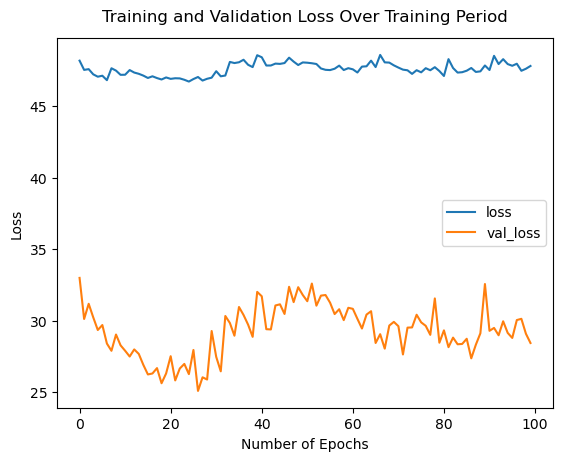

In [56]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

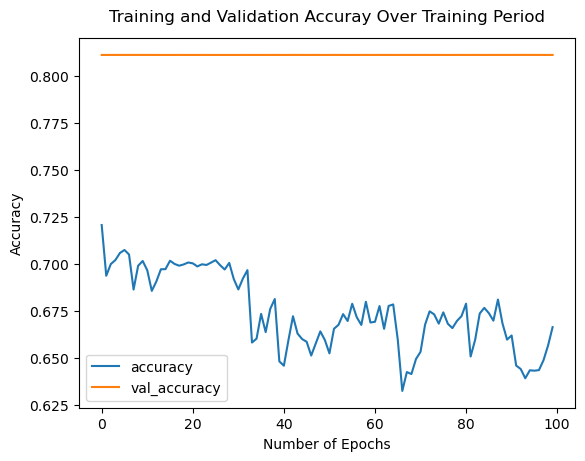

In [57]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.72242%, st_er: 0.000866%
y = 0.3842*x + 0.7403


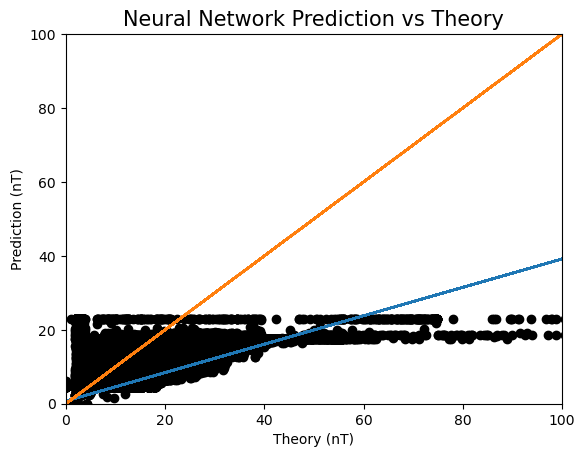

In [66]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [67]:
test_pred = model.predict(X1_pred)

5632/5632 [==============================] - 8s 1ms/step


In [68]:
df_test['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1018/4195812830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred


In [69]:
np.savetxt(img_path+"nn_lstm_36to38.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [70]:
df_test

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
901120,36,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901121,36,6,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901122,36,6,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901123,36,6,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
901124,36,6,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
...,...,...,...,...,...,...,...,...,...,...,...,...
1081339,36,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
1081340,36,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
1081341,36,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.007007
1081342,36,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.007007


# Non zero 36 to 38

In [77]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [78]:
shape = (len(X_train[0]),1)
model = keras.Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=shape)) 
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=True)) 
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False)) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy"])

In [79]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/100
17336/17336 [==============================] - 107s 6ms/step - loss: 248.0695 - accuracy: 2.8842e-05 - val_loss: 157.7957 - val_accuracy: 2.9402e-05
Epoch 2/100
17336/17336 [==============================] - 106s 6ms/step - loss: 242.7744 - accuracy: 2.8842e-05 - val_loss: 145.3300 - val_accuracy: 2.9402e-05
Epoch 3/100
17336/17336 [==============================] - 94s 5ms/step - loss: 241.6207 - accuracy: 2.8842e-05 - val_loss: 139.5910 - val_accuracy: 2.9402e-05
Epoch 4/100
17336/17336 [==============================] - 93s 5ms/step - loss: 241.8026 - accuracy: 2.8842e-05 - val_loss: 146.4151 - val_accuracy: 2.9402e-05
Epoch 5/100
17336/17336 [==============================] - 103s 6ms/step - loss: 239.5747 - accuracy: 2.8842e-05 - val_loss: 139.4053 - val_accuracy: 2.9402e-05
Epoch 6/100
17336/17336 [==============================] - 101s 6ms/step - loss: 240.1715 - accuracy: 2.8842e-05 - val_loss: 151.6667 - val_accuracy: 2.9402e-05
Epoch 7/100
17336/17336 [===========

Epoch 52/100
17336/17336 [==============================] - 86s 5ms/step - loss: 239.2913 - accuracy: 2.8842e-05 - val_loss: 164.8020 - val_accuracy: 2.9402e-05
Epoch 53/100
17336/17336 [==============================] - 87s 5ms/step - loss: 238.9686 - accuracy: 2.8842e-05 - val_loss: 147.7243 - val_accuracy: 2.9402e-05
Epoch 54/100
17336/17336 [==============================] - 86s 5ms/step - loss: 240.6593 - accuracy: 2.8842e-05 - val_loss: 137.9798 - val_accuracy: 2.9402e-05
Epoch 55/100
17336/17336 [==============================] - 86s 5ms/step - loss: 239.2449 - accuracy: 2.8842e-05 - val_loss: 146.8670 - val_accuracy: 2.9402e-05
Epoch 56/100
17336/17336 [==============================] - 86s 5ms/step - loss: 239.3838 - accuracy: 2.8842e-05 - val_loss: 146.2608 - val_accuracy: 2.9402e-05
Epoch 57/100
17336/17336 [==============================] - 86s 5ms/step - loss: 239.3837 - accuracy: 2.8842e-05 - val_loss: 128.6731 - val_accuracy: 2.9402e-05
Epoch 58/100
17336/17336 [========

In [80]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

17336/17336 [==============================] - 29s 2ms/step
239.05657654156545
0.43084512501770145
1063/1063 [==============================] - 2s 1ms/step
152.0112611870748
0.7000840386740436


In [81]:
model.evaluate(X_test, y_test)

1063/1063 [==============================] - 2s 2ms/step - loss: 152.0112 - accuracy: 2.9402e-05


[152.01119995117188, 2.9402252039290033e-05]

In [82]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.55016987],
       [0.55016987, 1.        ]])

In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 5, 10)             480       
                                                                 
 dropout_12 (Dropout)        (None, 5, 10)             0         
                                                                 
 lstm_13 (LSTM)              (None, 5, 10)             840       
                                                                 
 dropout_13 (Dropout)        (None, 5, 10)             0         
                                                                 
 lstm_14 (LSTM)              (None, 10)                840       
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [84]:
history.history

{'loss': [248.06951904296875,
  242.7744140625,
  241.62066650390625,
  241.80259704589844,
  239.57469177246094,
  240.17149353027344,
  242.82968139648438,
  243.79795837402344,
  242.29920959472656,
  242.81626892089844,
  242.67698669433594,
  242.09780883789062,
  241.87734985351562,
  240.7778778076172,
  240.22962951660156,
  239.6231231689453,
  241.37608337402344,
  239.84507751464844,
  241.104736328125,
  240.3155975341797,
  239.78518676757812,
  238.7644500732422,
  240.6158905029297,
  240.5888214111328,
  240.72430419921875,
  239.85108947753906,
  239.7377471923828,
  240.17691040039062,
  239.58560180664062,
  239.24862670898438,
  239.4711456298828,
  239.0708465576172,
  240.12020874023438,
  239.6048583984375,
  240.66510009765625,
  240.88818359375,
  239.26296997070312,
  239.62596130371094,
  240.85806274414062,
  241.0042724609375,
  238.9625701904297,
  241.79541015625,
  238.70541381835938,
  237.5480194091797,
  239.64495849609375,
  238.29722595214844,
  240

In [89]:
file = model_path+'model_lstm_nonzero_36to38.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmphwaajb5o/assets


INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmphwaajb5o/assets


## Plot

### Loss function (MSE)

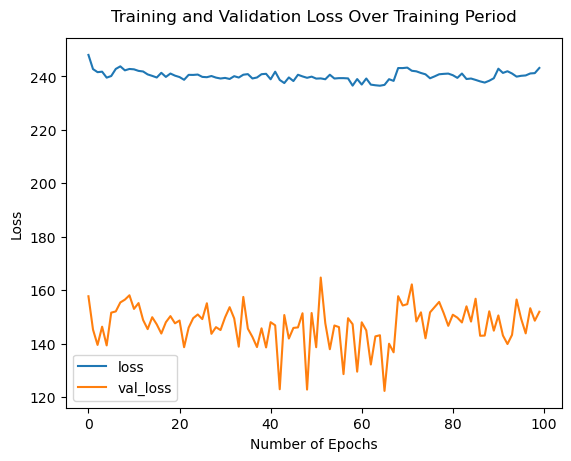

In [86]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

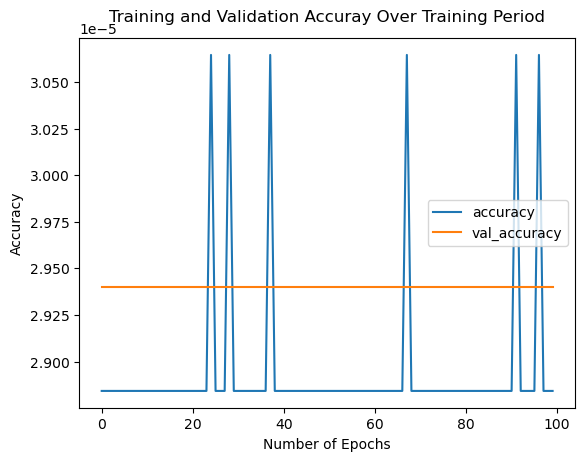

In [87]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.55017%, st_er: 0.001682%
y = 0.2044*x + 5.1262


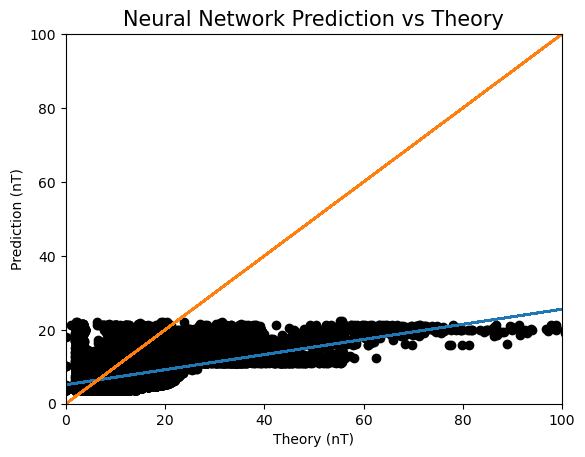

In [88]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [91]:
df_test['predict2'] = 0

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1018/715908166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = 0


In [94]:
test_pred = model.predict(X4_pred)

1063/1063 [==============================] - 2s 2ms/step


In [95]:
df4_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1018/2364276288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred['predict'] = test_pred


In [96]:
df4_pred

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,predict
931880,36,6,7,32,40,-183.593781,-184.268631,-199.538742,-215.528793,-215.355865,4.988159,7.586035
931881,36,6,7,32,41,-383.761566,-383.066467,-395.916077,-417.522858,-420.110077,4.591202,4.927734
931882,36,6,7,32,42,-779.052185,-785.270813,-803.943787,-811.441101,-799.951233,4.237324,3.609527
931883,36,6,7,32,43,-1017.557312,-1026.294189,-1037.133667,-1050.012451,-1046.674072,3.918999,3.611115
931919,36,6,7,33,15,-1508.948120,-1513.032471,-1527.041992,-1536.478027,-1540.133301,3.371496,3.611235
...,...,...,...,...,...,...,...,...,...,...,...,...
1050968,36,6,36,37,24,-27.330389,-28.598026,-46.617607,-59.281792,-58.657875,7.175758,6.657572
1050979,36,6,36,37,35,171.250366,175.768433,151.715485,130.792816,139.797287,8.527348,11.439997
1050982,36,6,36,37,38,-96.352455,-94.962585,-115.256683,-131.555984,-127.650993,6.039019,7.222900
1050983,36,6,36,37,39,-235.110947,-235.878754,-253.580444,-268.104340,-266.388824,5.501382,6.006336


In [98]:
df_out = df_test[['i', 'j', 'k', 'predict2']]
df_pre = df4_pred[['i', 'j', 'k', 'predict']]

In [99]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
    df_out.loc[idx, 'predict2']= pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1018/3149009882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.loc[idx, 'predict2']= pred


In [101]:
df_out[(df_out['i']==7) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,predict2
931880,7,32,40,7.586035


In [102]:
np.savetxt(img_path+"nn_lstm_nonzero_36to38.txt", df_out[['i', 'j', 'k', 'predict2']], fmt="%i %i %i %s")